# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.cluster import KMeans

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [354]:
#read the data

data_path = r'C:\Users\DELL\Downloads\CC GENERAL (1).csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [23]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# feel free to investigate what you want


BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFF_PURCHASES : Maximum purchase amount done in one-go

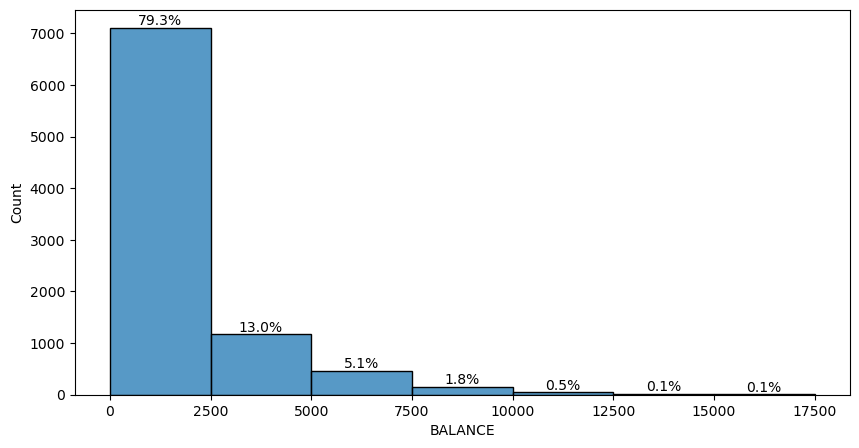

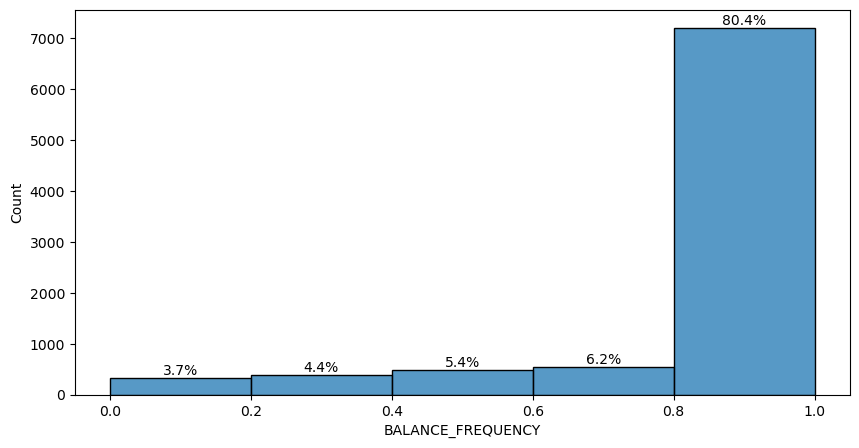

In [63]:
col = ["BALANCE", "BALANCE_FREQUENCY"]
bins = [[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500], [0, 0.2, 0.4, 0.6, 0.8, 1]]

for i in range(len(col)):

    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col[i], bins=bins[i])

    counts, _ = np.histogram(df[col[i]], bins=bins[i])
    # print(counts,_)
    for j in range(len(counts)):
        percentage = '{:.1f}%'.format(100 * (counts[j] / len(df)))
        plt.text((bins[i][j] + bins[i][j+1]) / 2, counts[j], percentage, ha='center', va='bottom')

    plt.show()

### 80% people update there balance frequently
### 80% people balance are 2500 or less

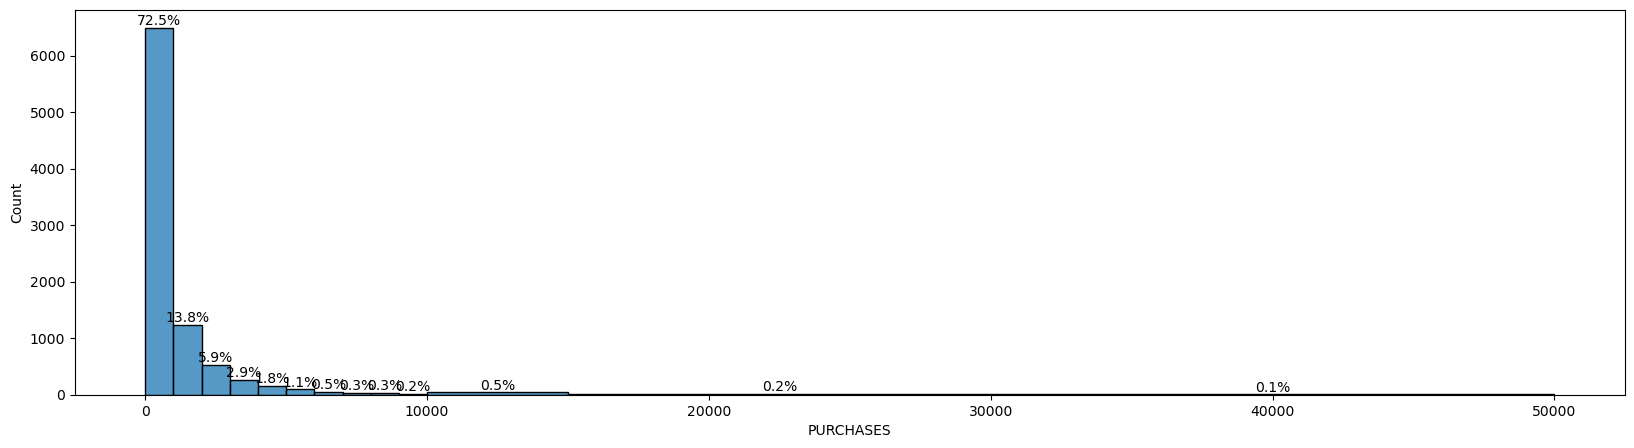

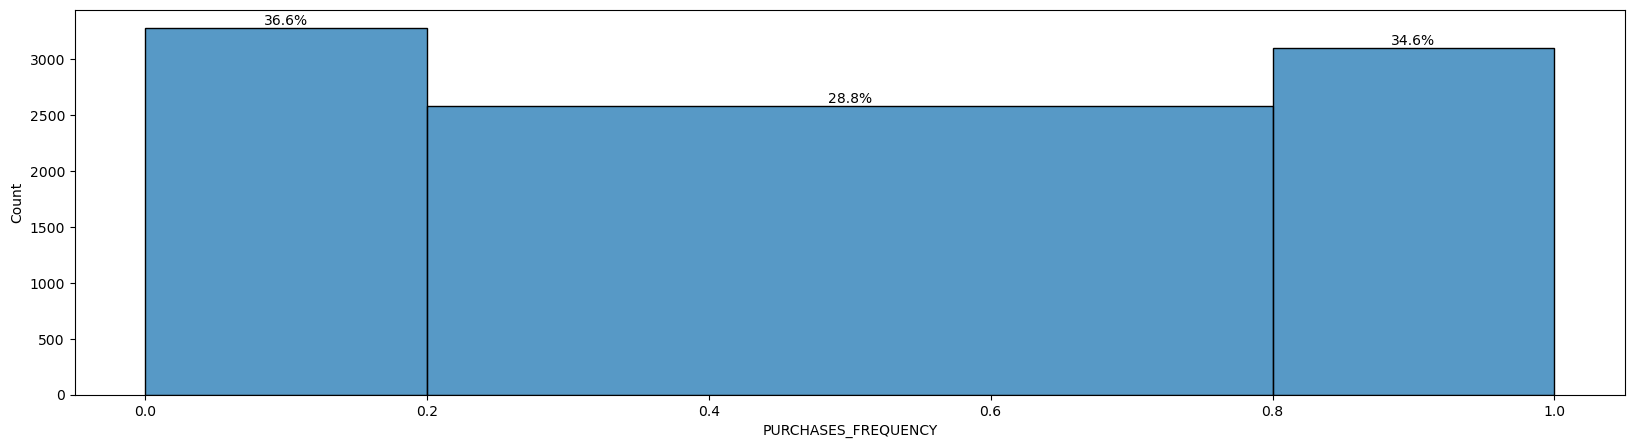

In [60]:
col = ['PURCHASES', 'PURCHASES_FREQUENCY']
bins = [[0,1000,2000,3000,4000,5000,6000,7000 ,8000 ,9000,10000 ,15000 , 30000 , 50000] , [0,0.2 ,0.8, 1] ]
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i] , bins=bins[i] )
    
    
    counts, _ = np.histogram(df[col[i]], bins=bins[i])
    for j in range(len(counts)):
        
        percentage = '{:.1f}%'.format(100 * (counts[j] / len(df)))
        plt.text((bins[i][j] + bins[i][j+1]) / 2, counts[j], percentage, ha='center', va='bottom')
    
    plt.show()

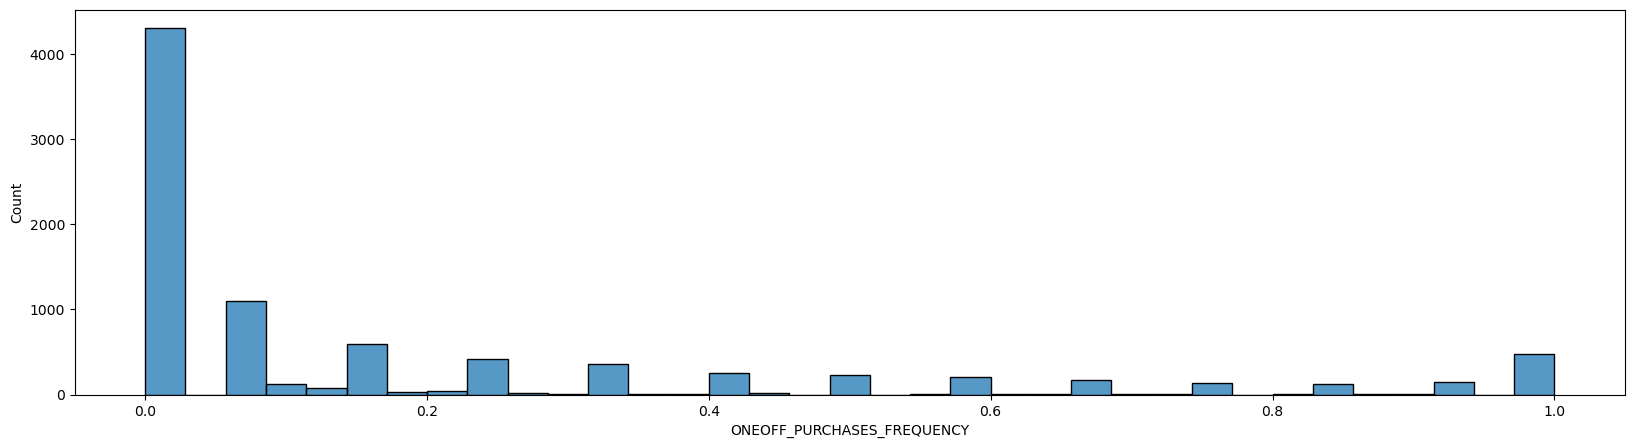

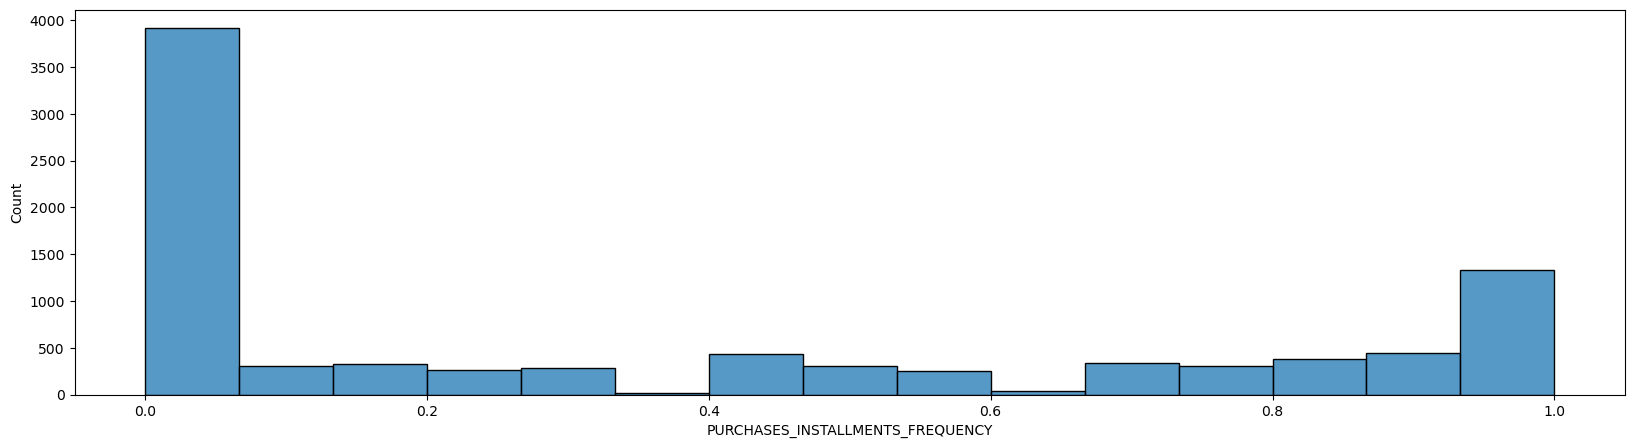

In [61]:
col = ['ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i] )
    plt.show()

### most people buy more with installement

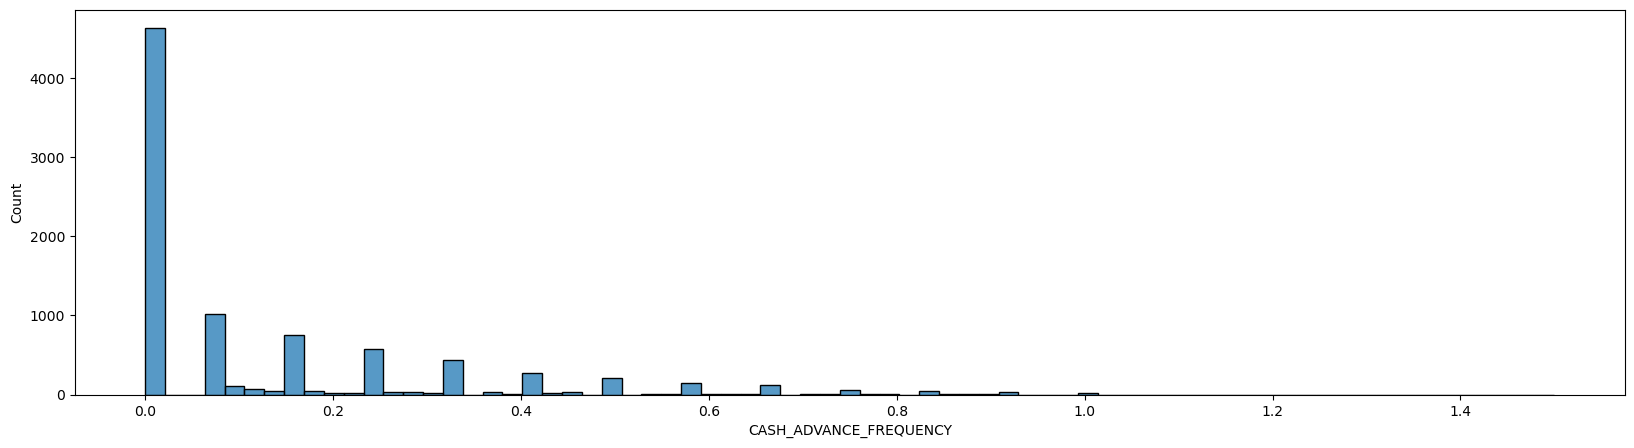

In [64]:
col = ['CASH_ADVANCE_FREQUENCY']
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i])
    plt.show()

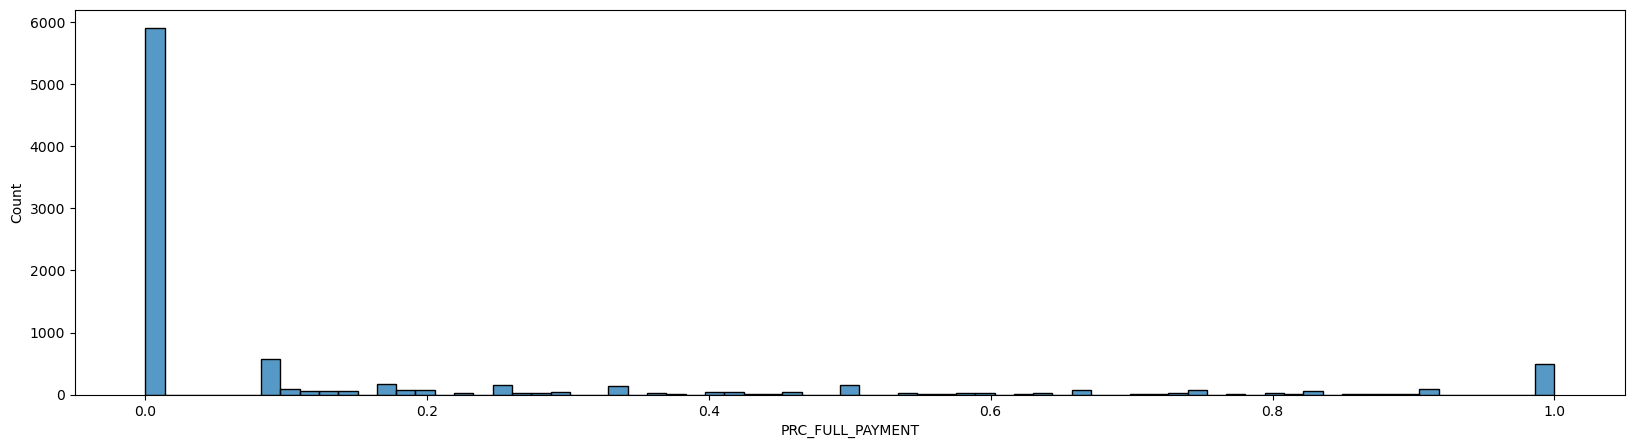

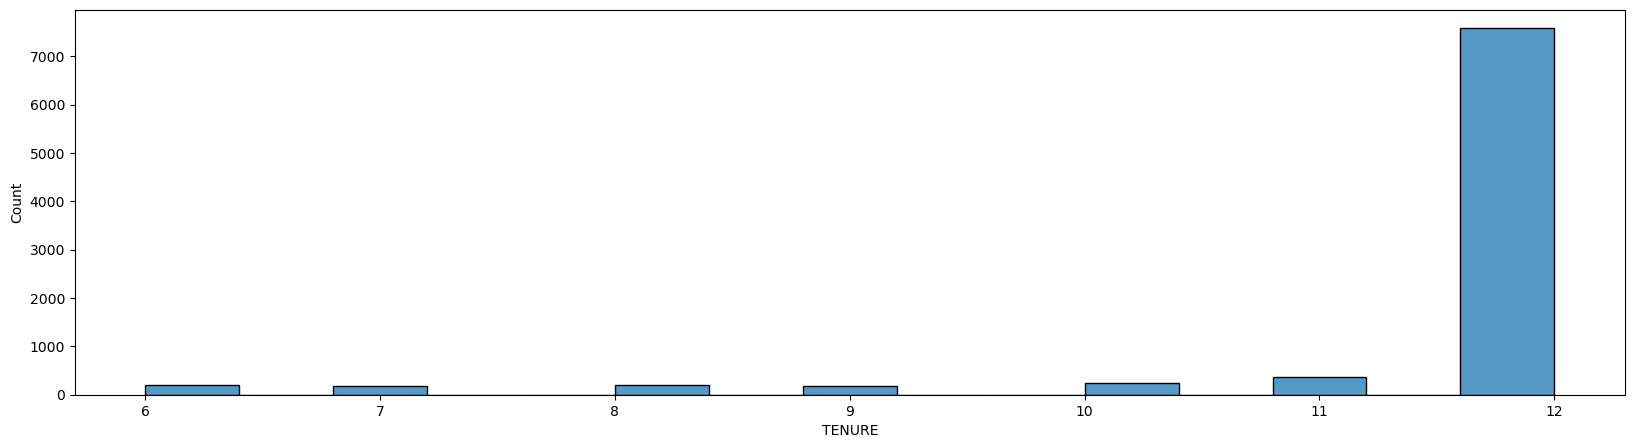

In [65]:
col = ['PRC_FULL_PAYMENT','TENURE']
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df,x = col[i])
    plt.show()

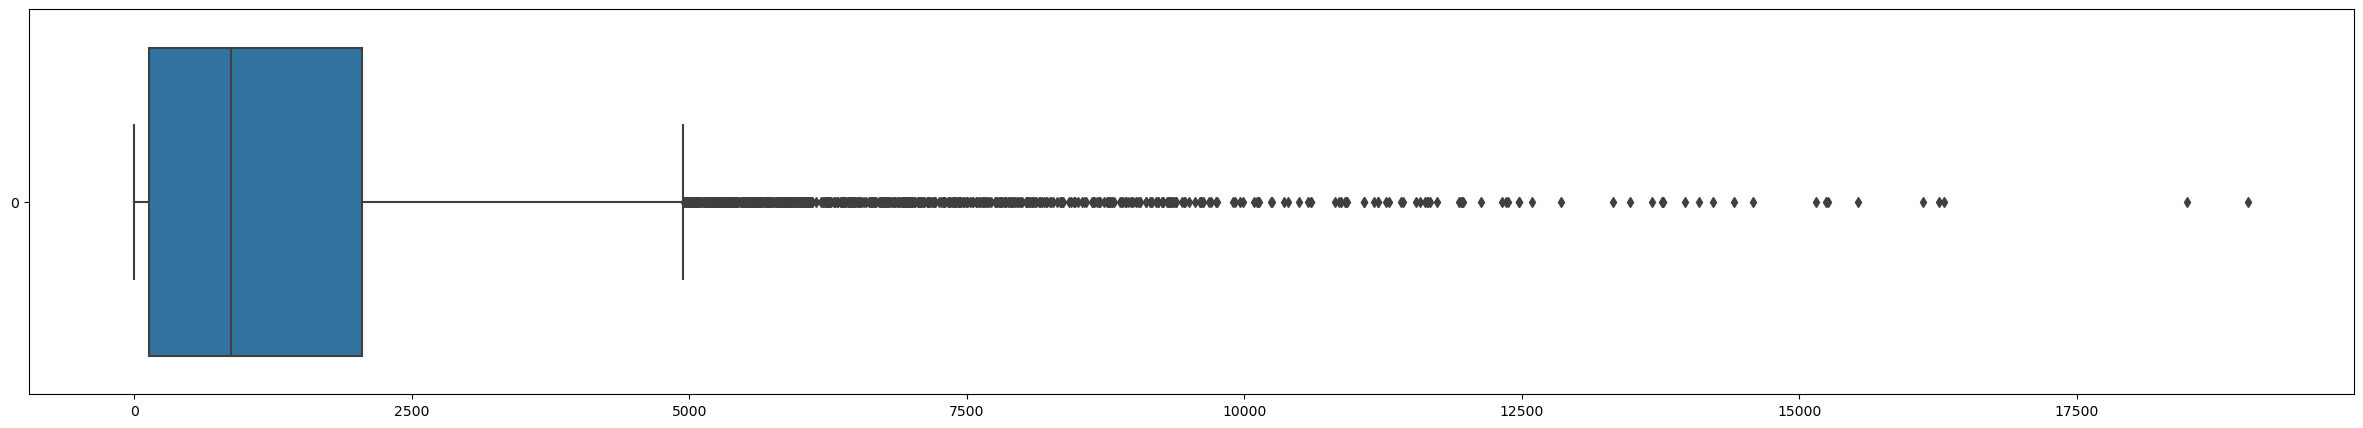

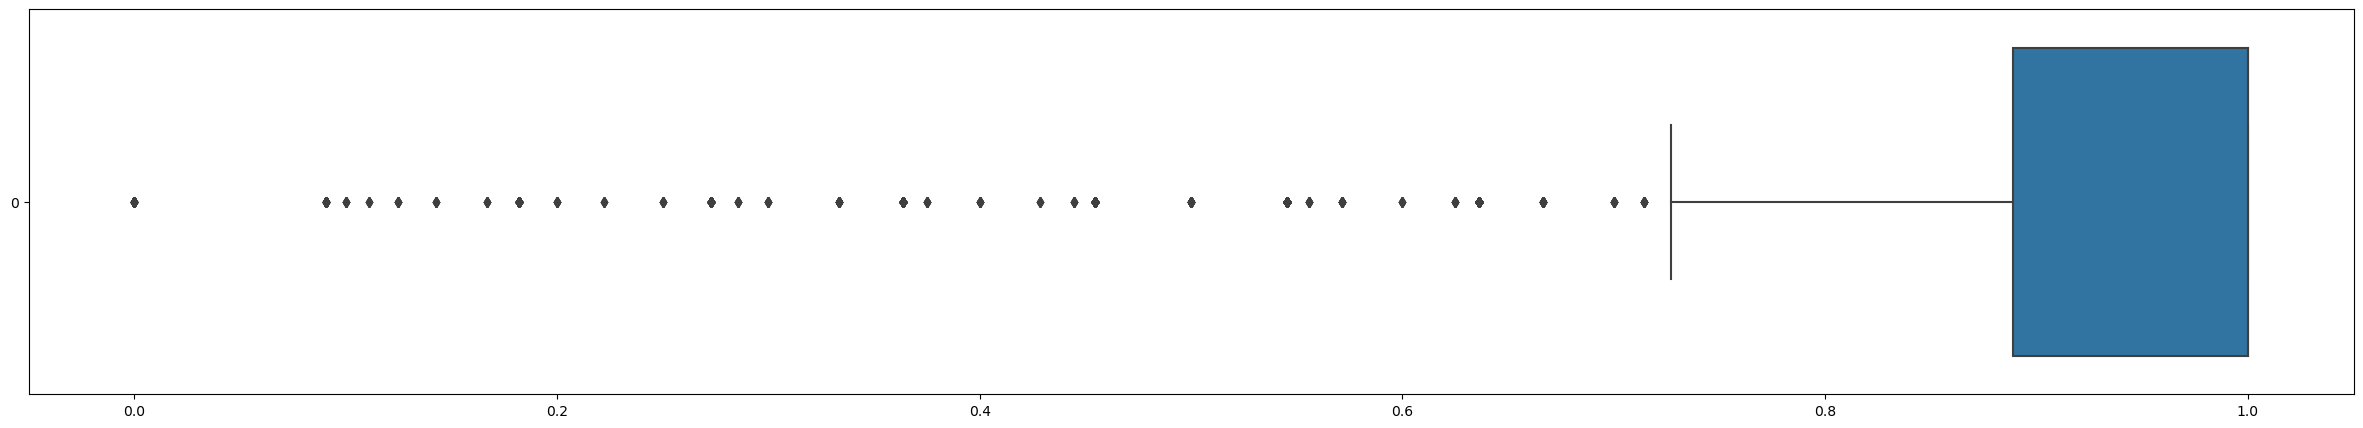

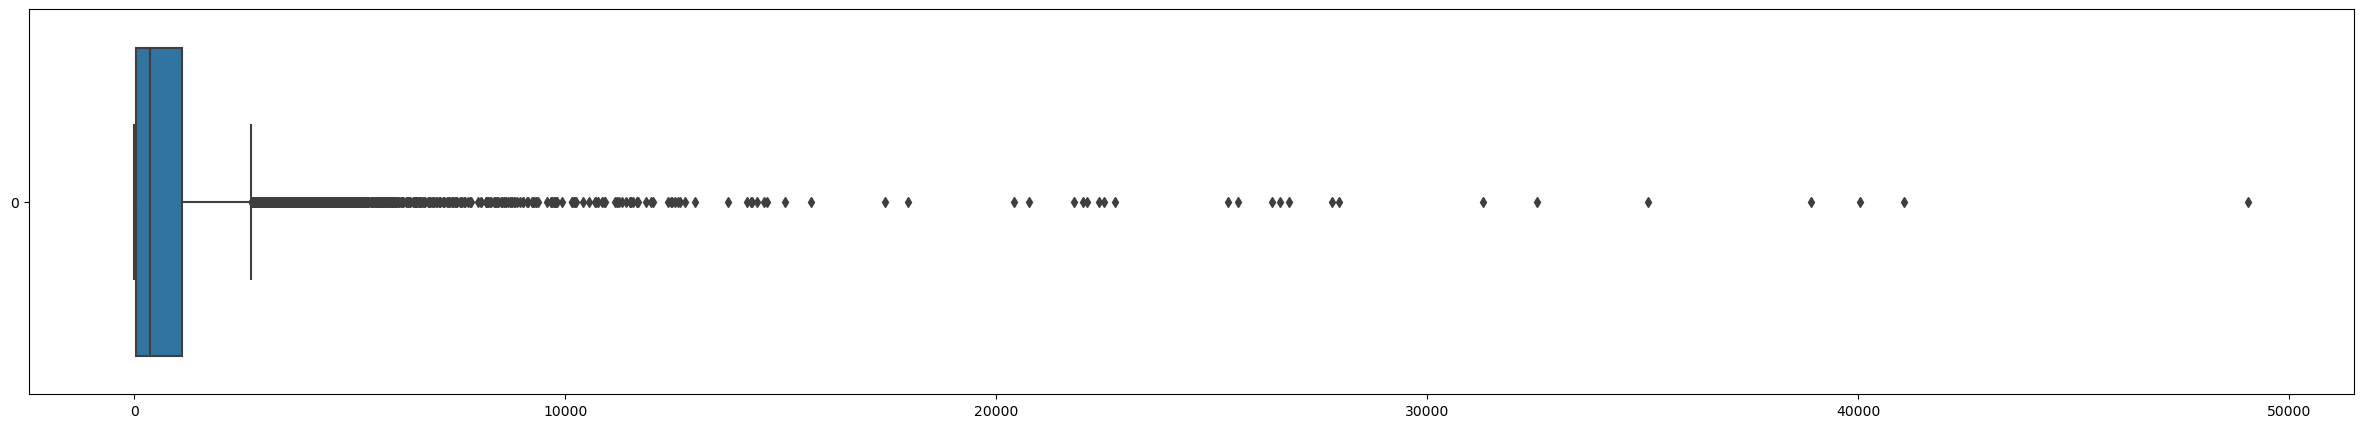

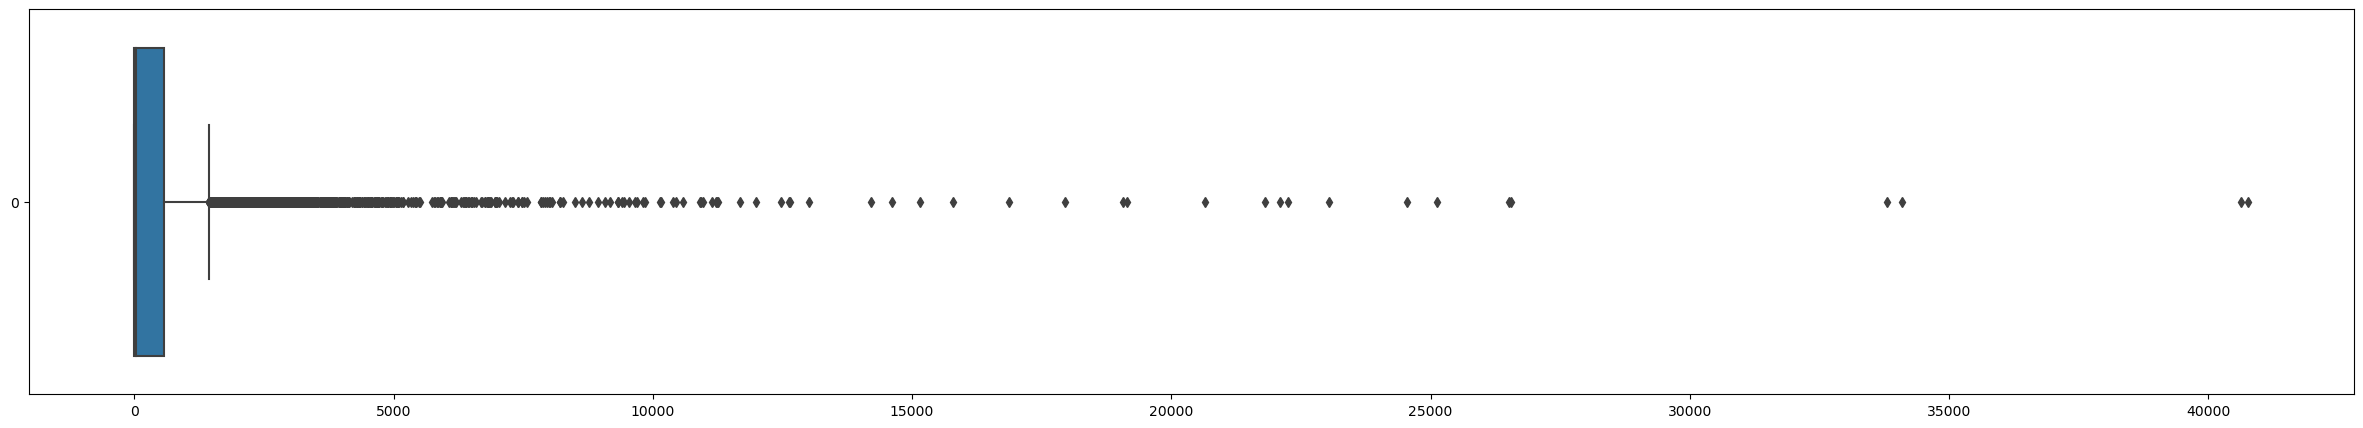

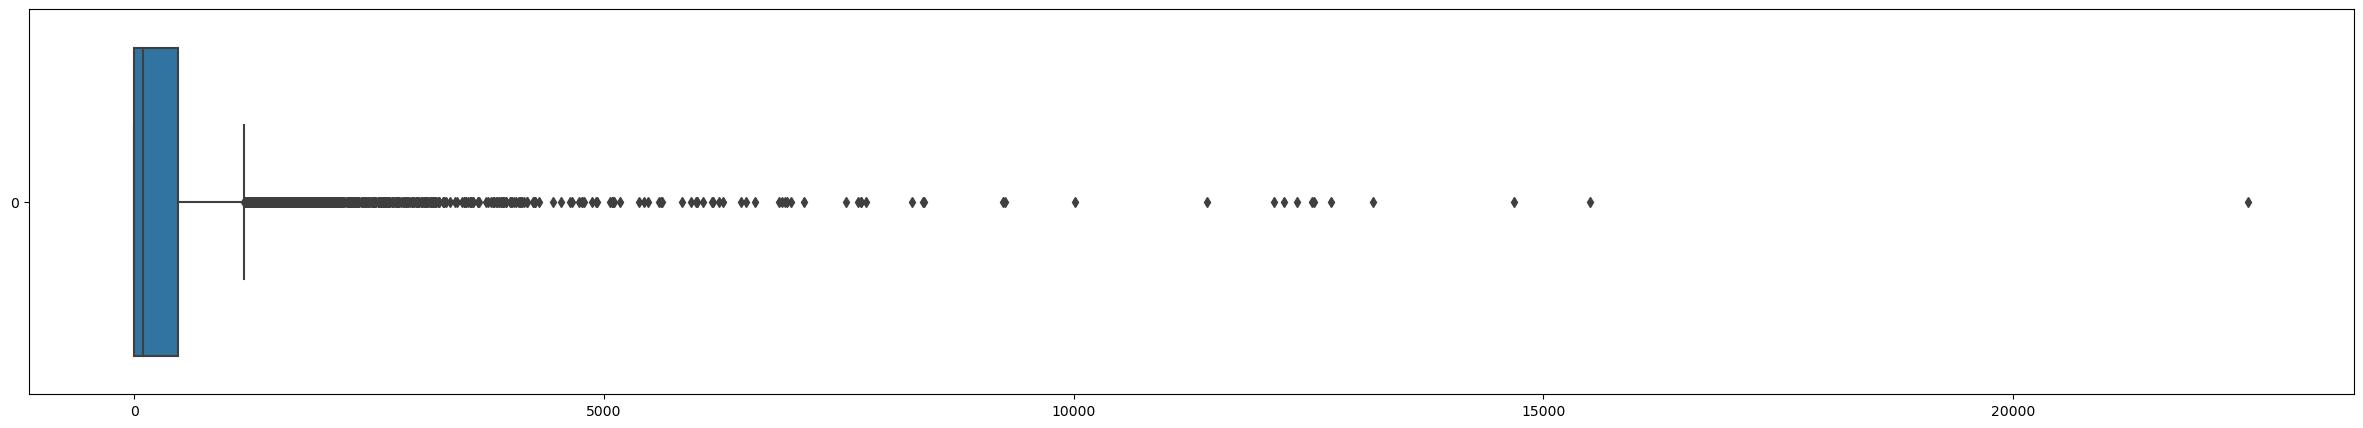

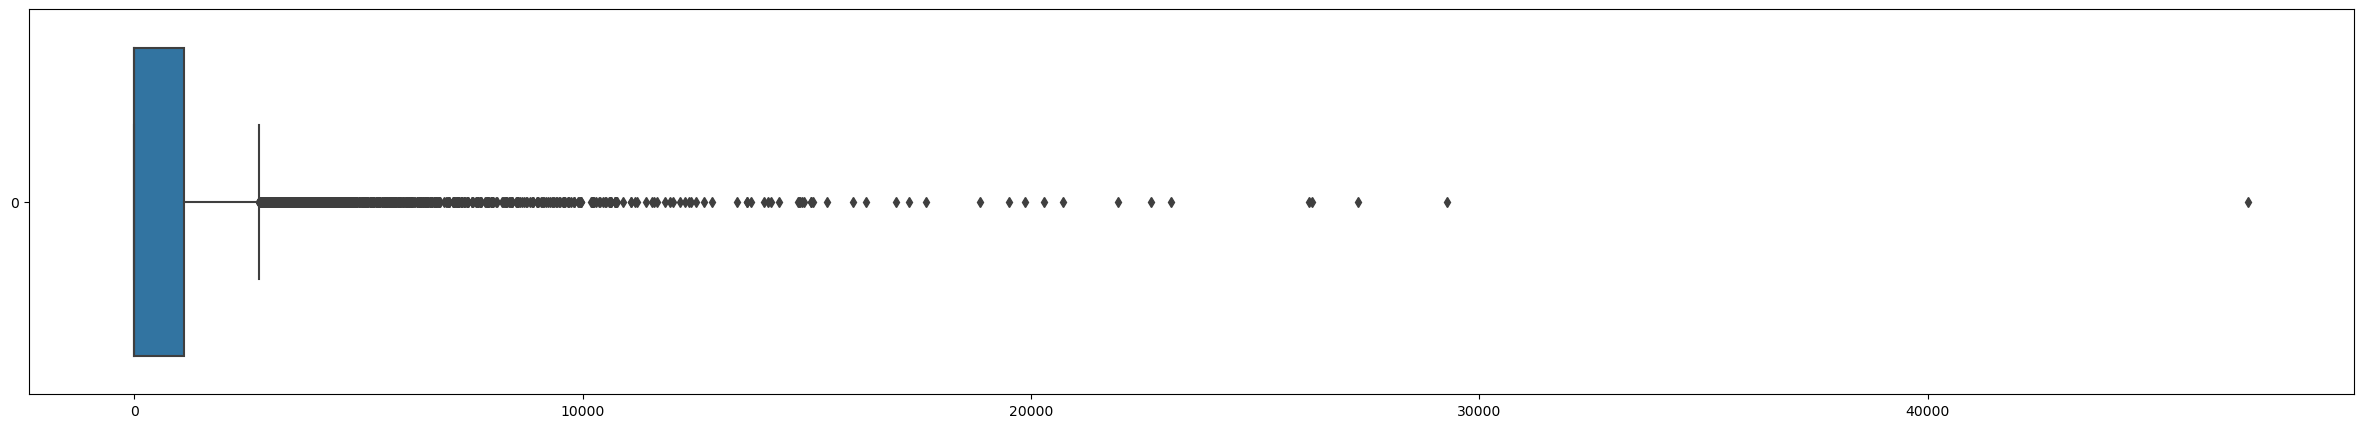

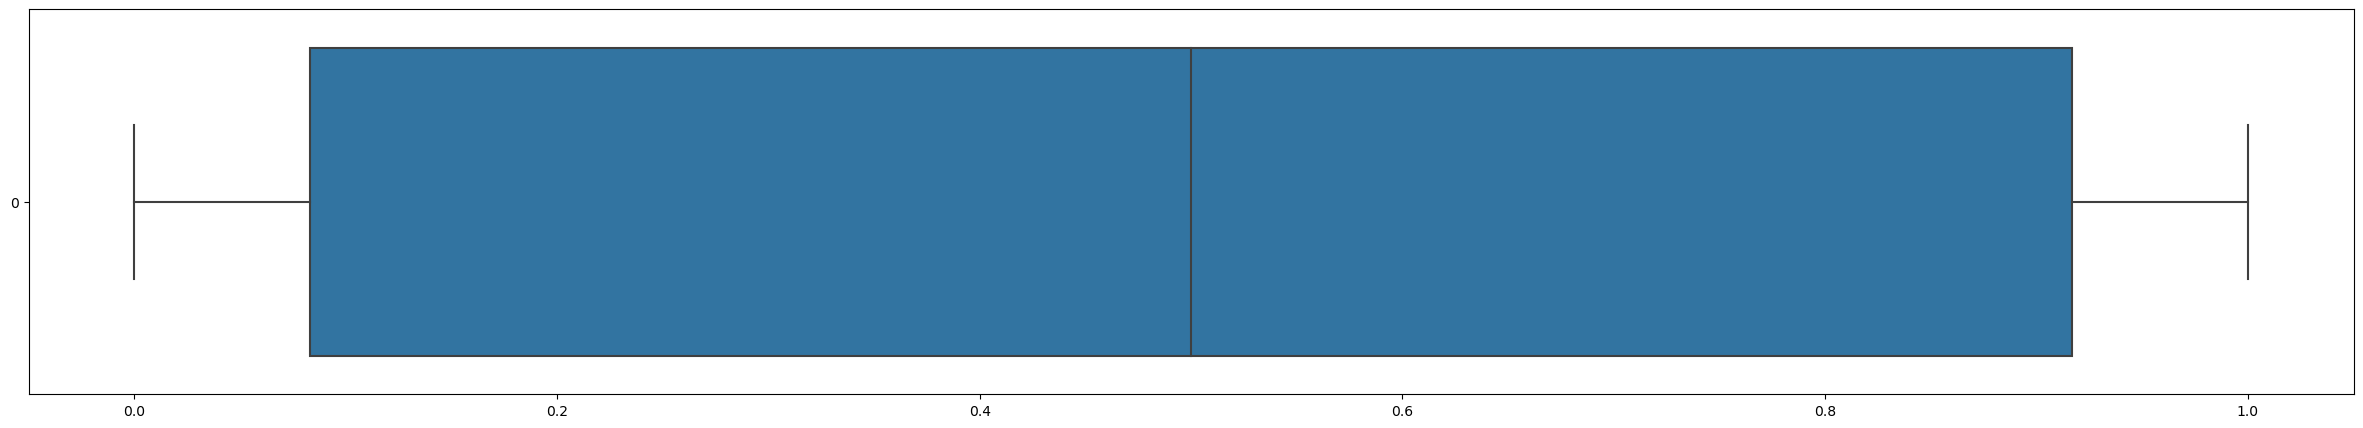

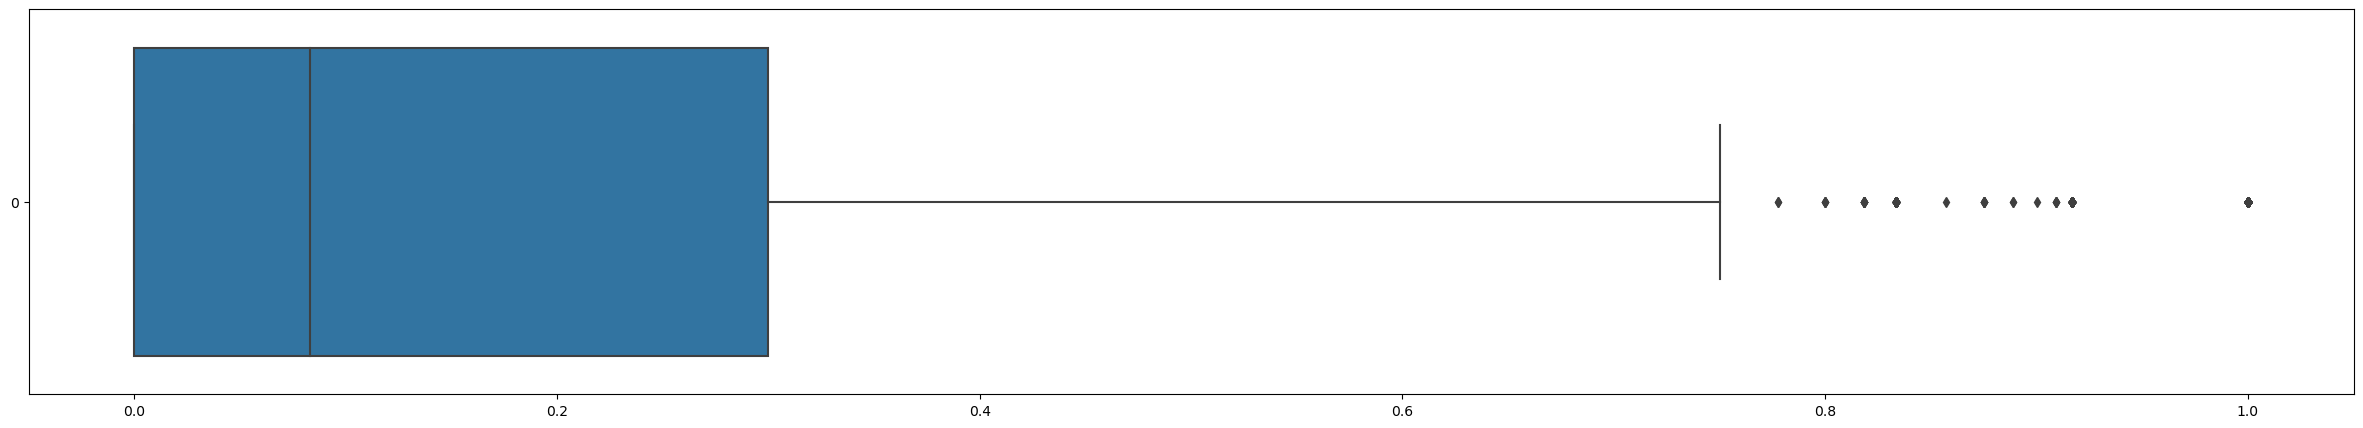

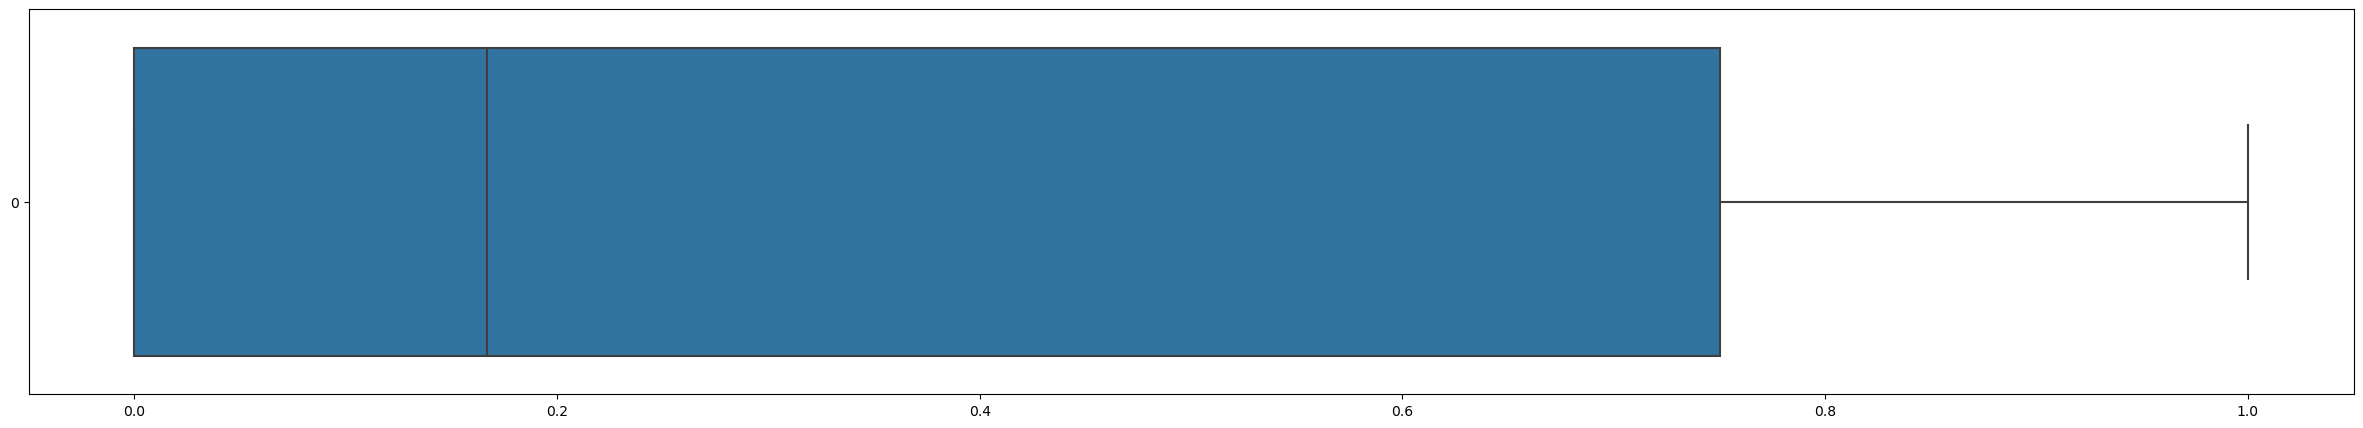

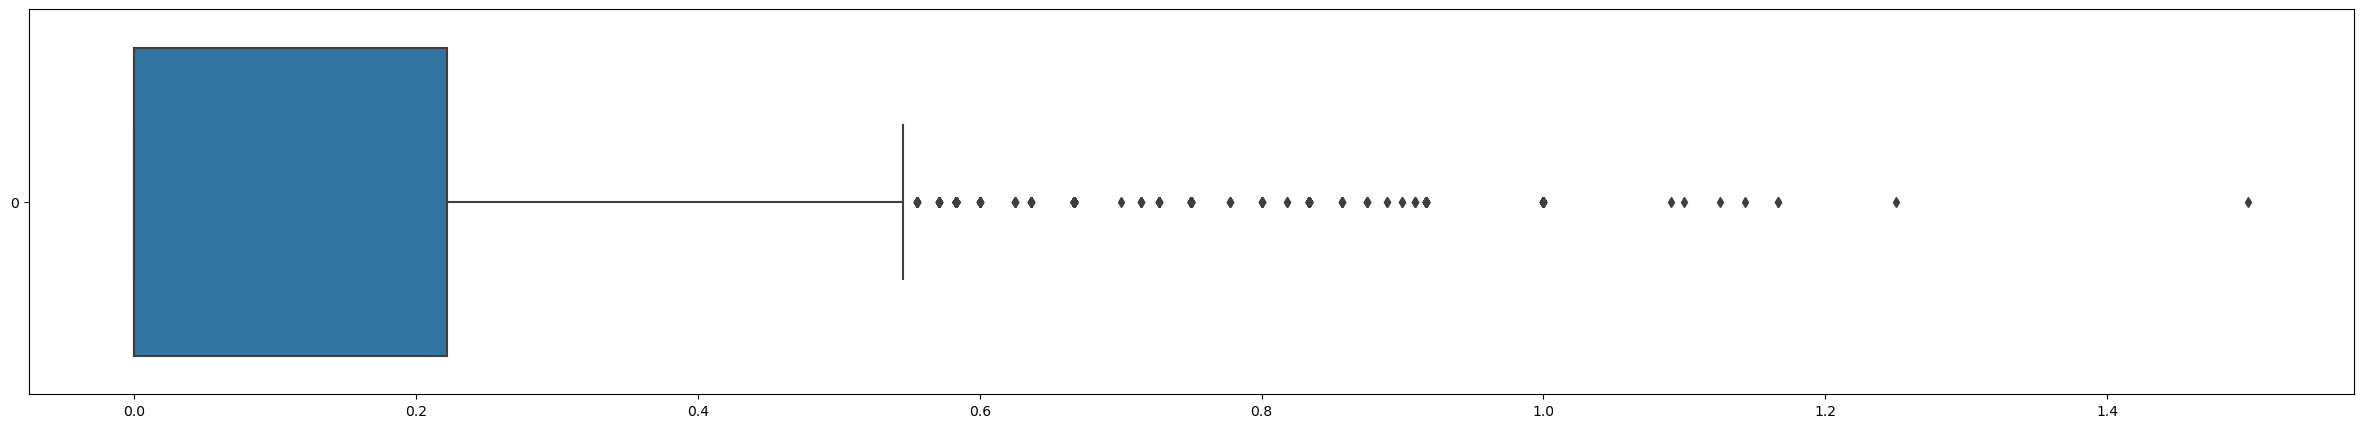

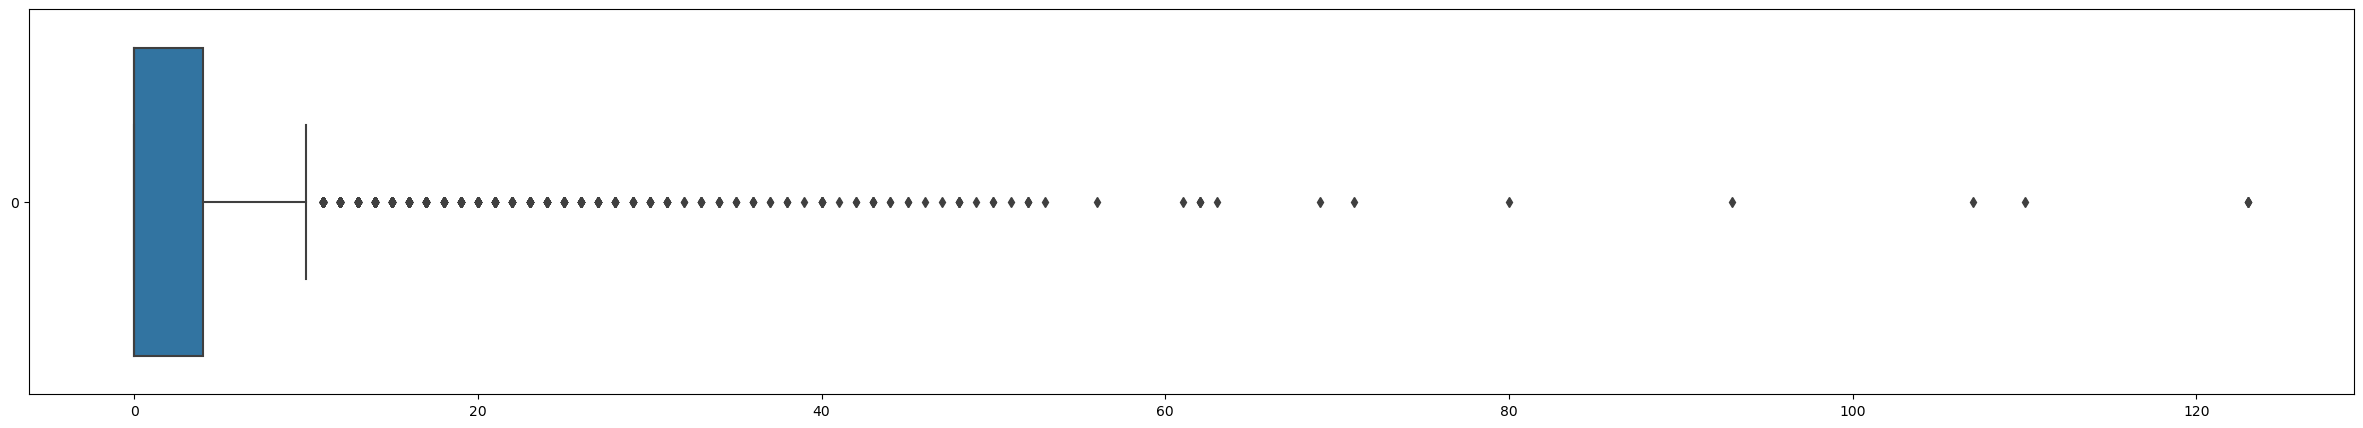

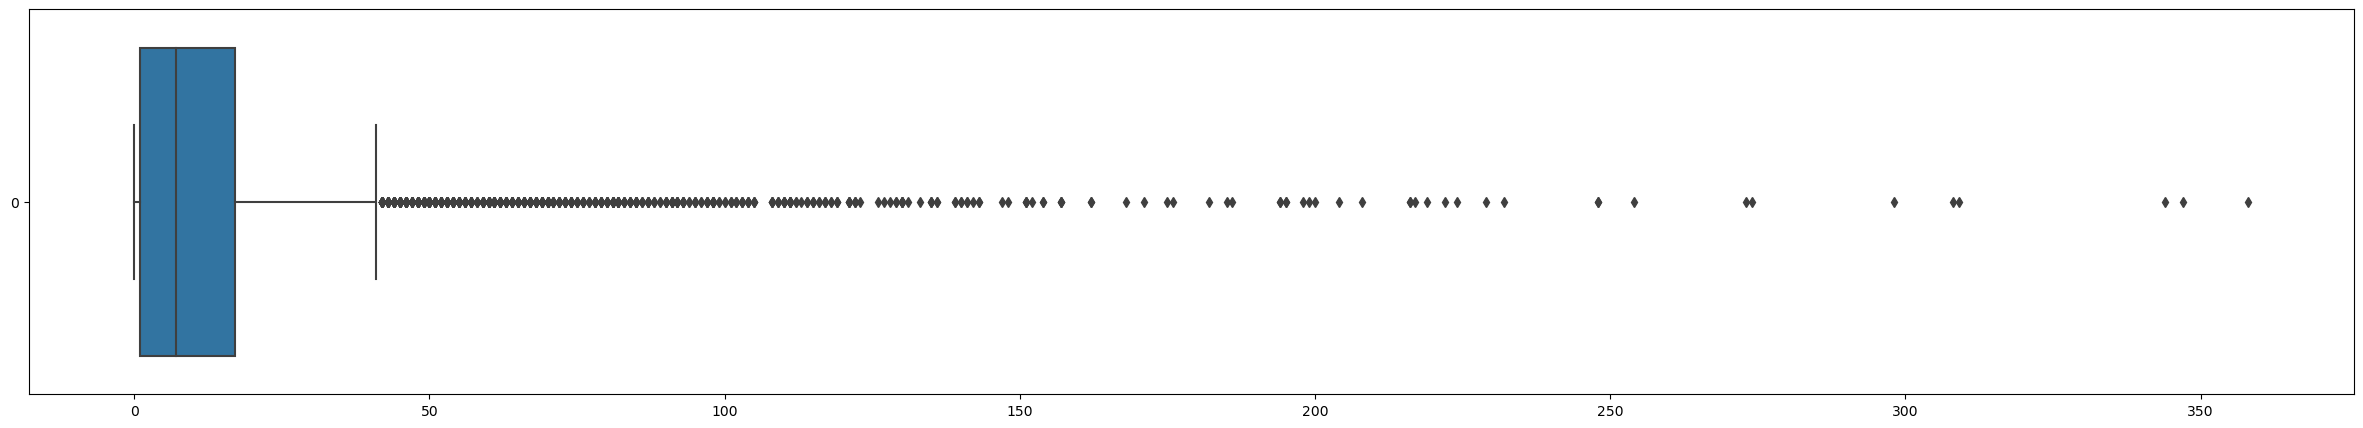

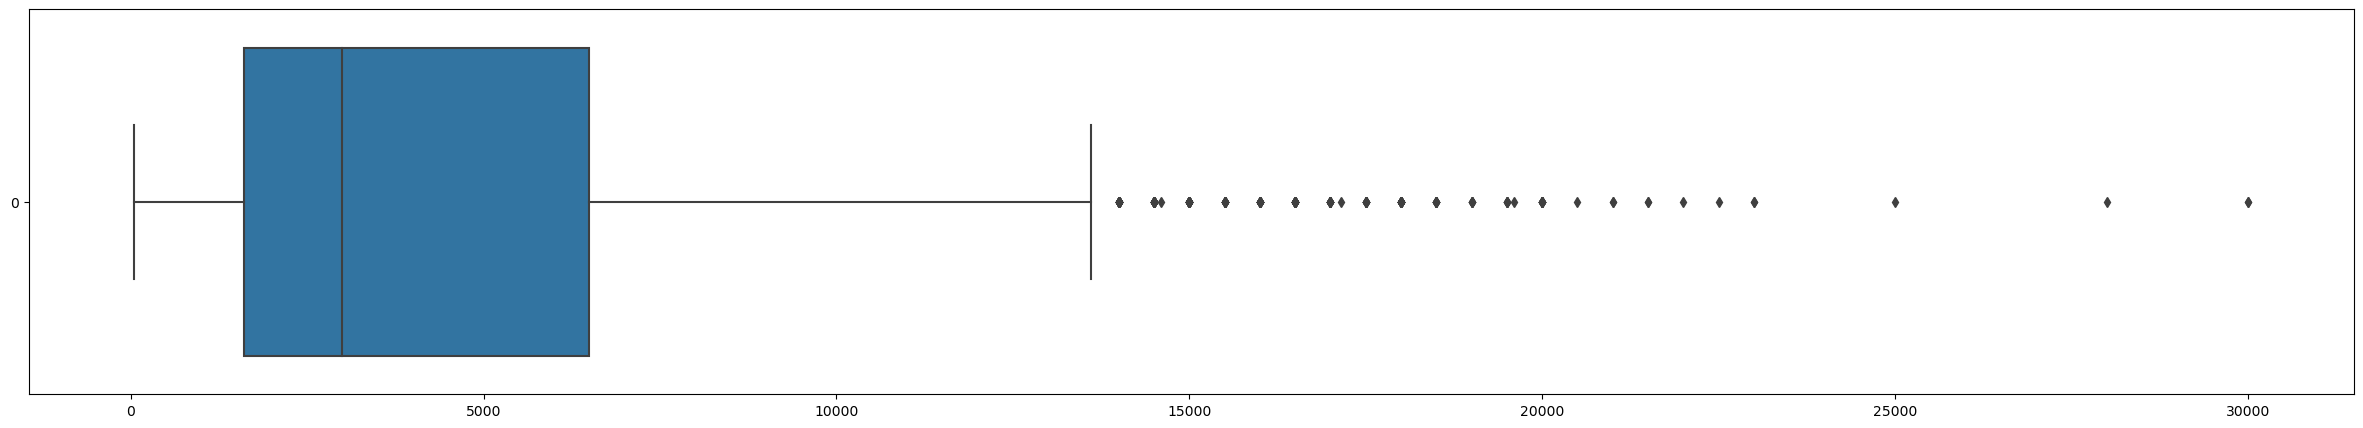

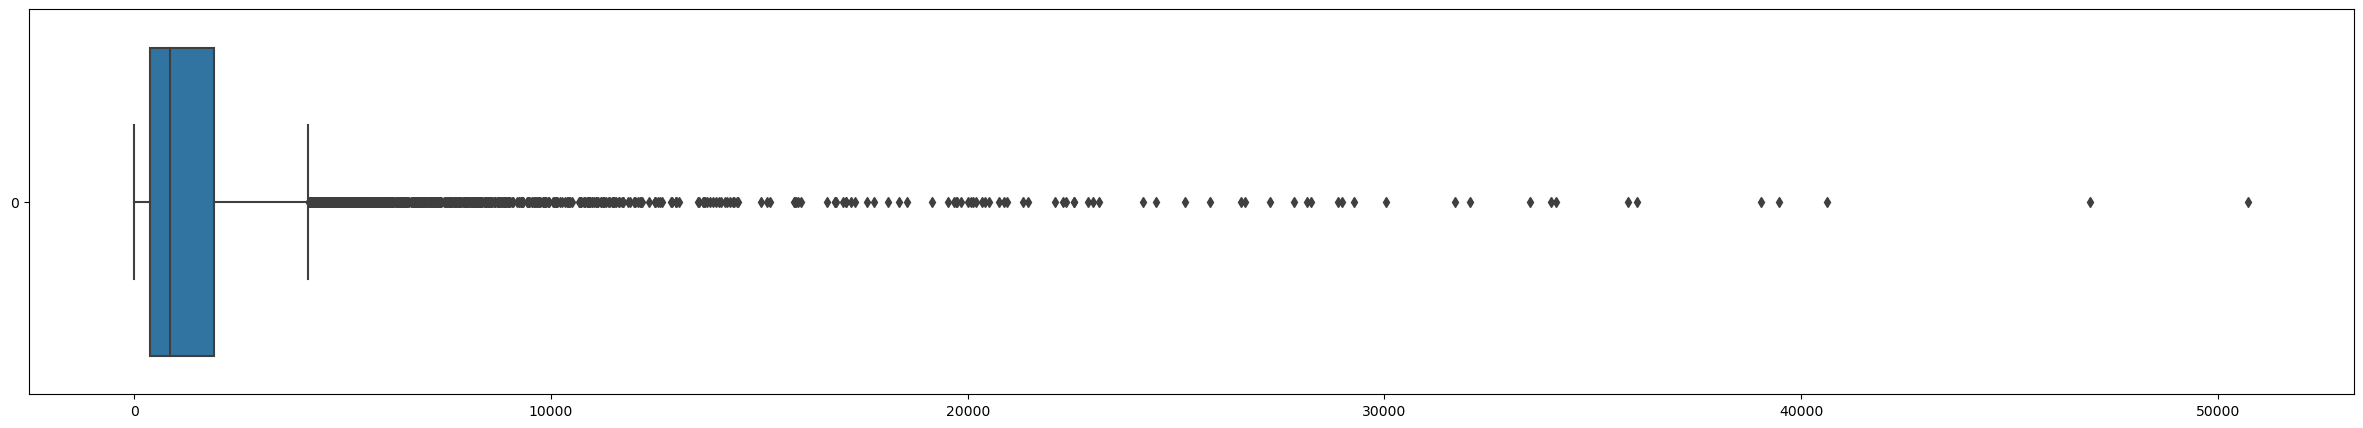

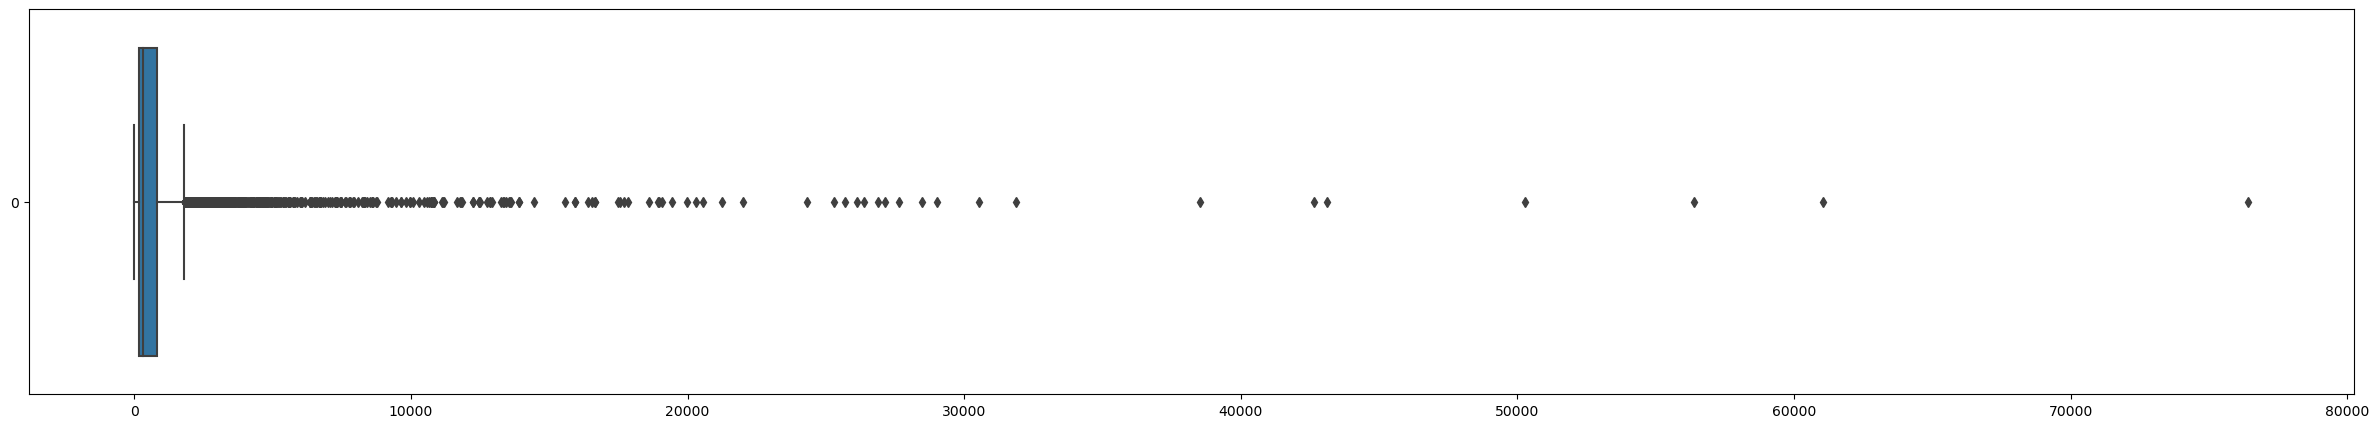

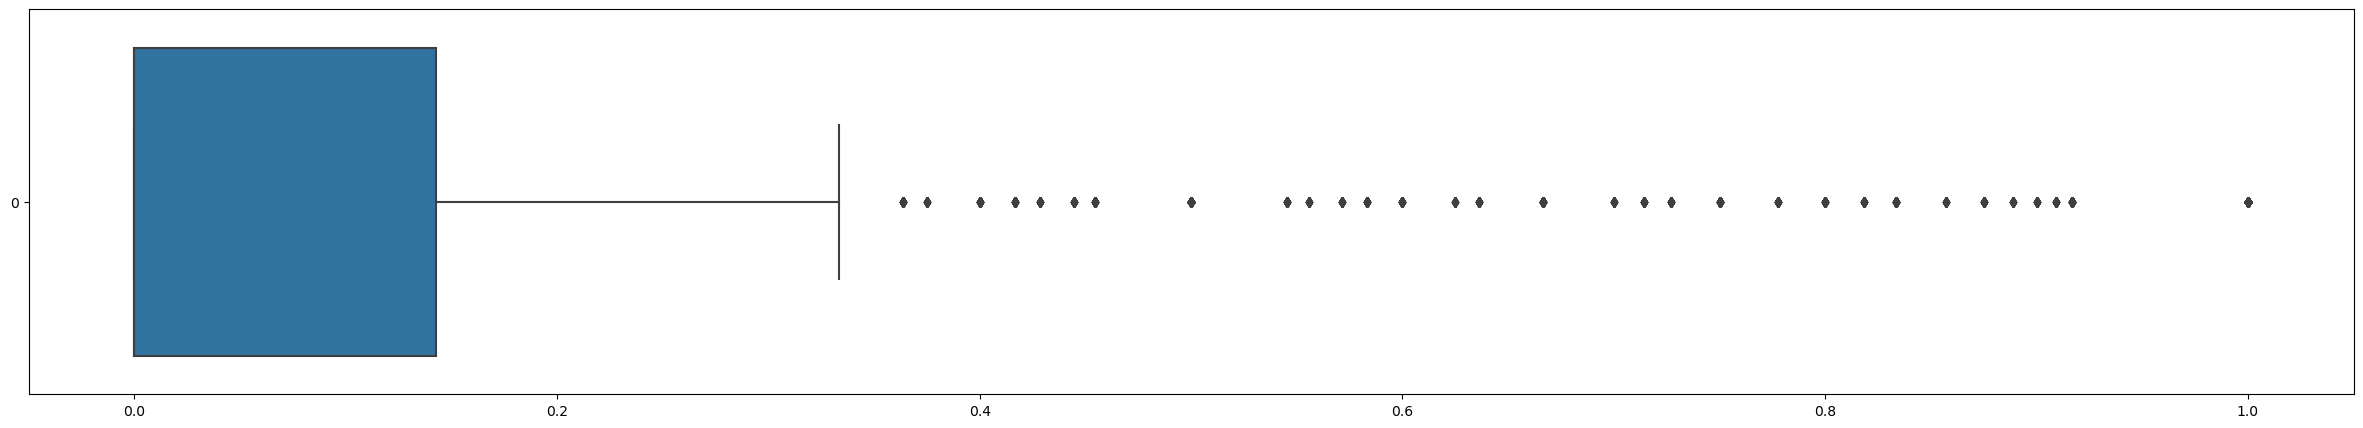

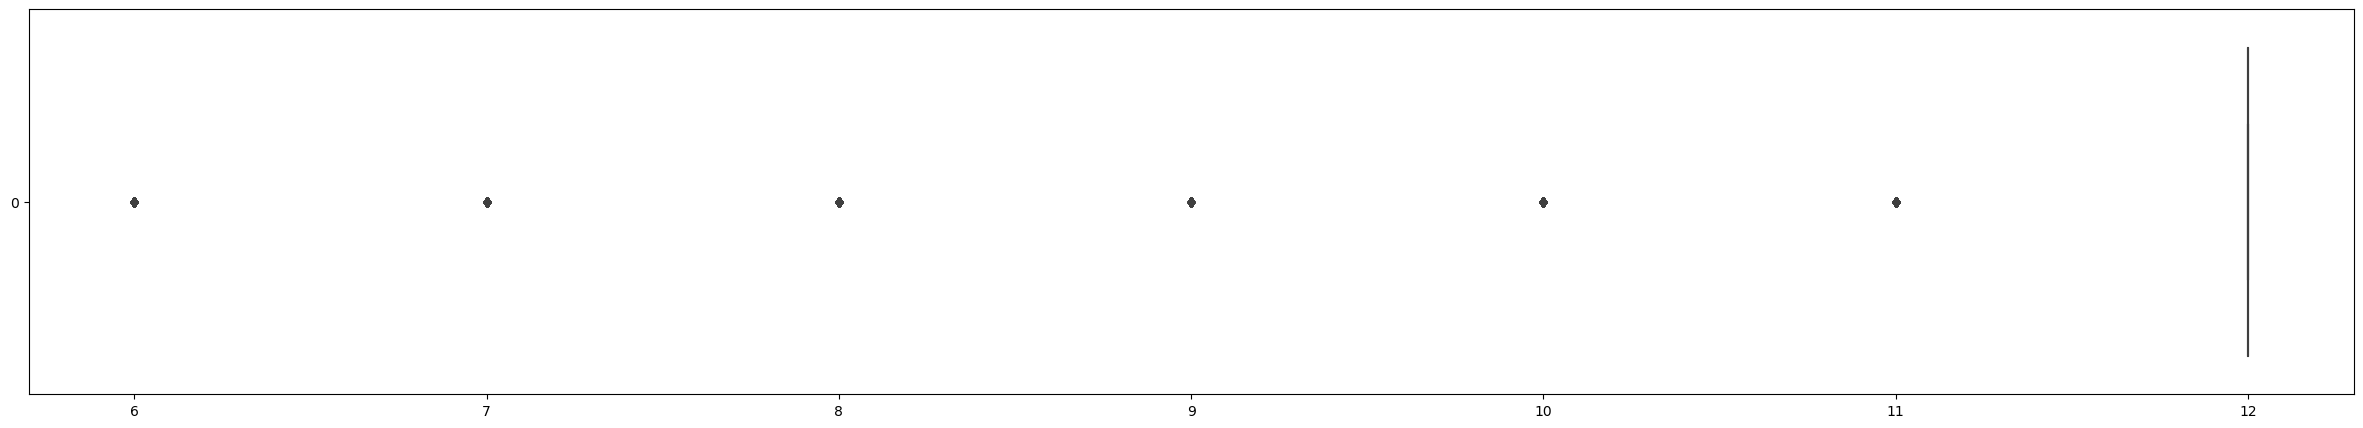

In [66]:
for column in df.columns[1:]:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column] , orient='h')
    plt.show()

<Axes: >

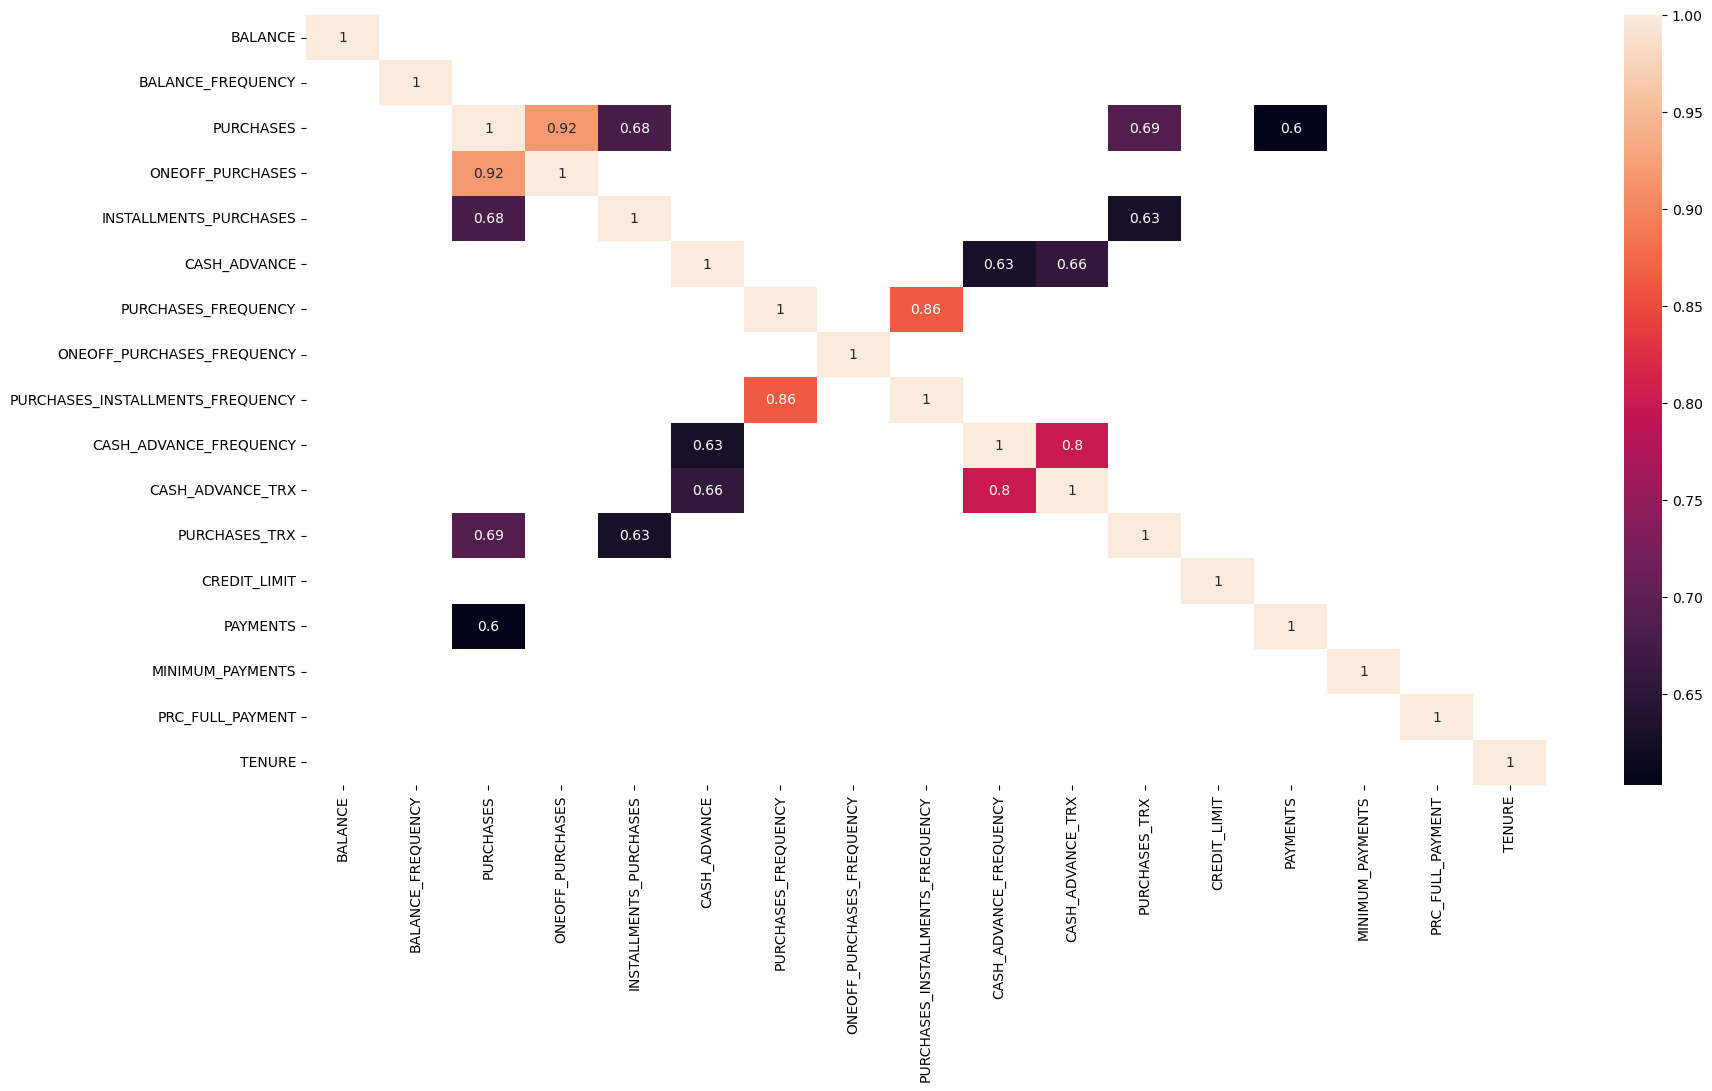

In [67]:
plt.figure(figsize=(20,10))
coorlation = df.iloc[:,1:].corr()
thresh = 0.6
sns.heatmap(coorlation[abs(coorlation) > thresh] , annot=True)

<Axes: xlabel='CREDIT_LIMIT', ylabel='BALANCE'>

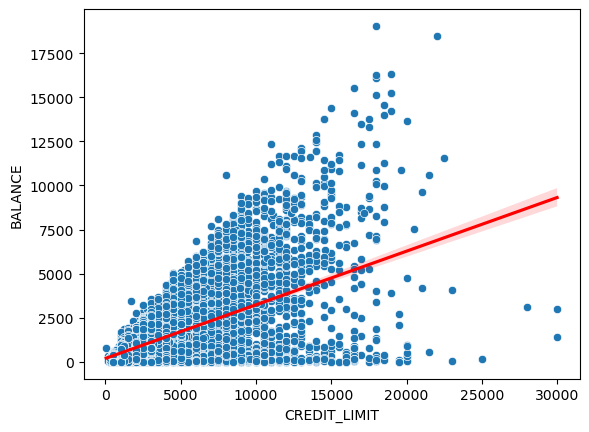

In [71]:
sns.scatterplot(data=df , x='CREDIT_LIMIT' , y='BALANCE')
sns.regplot(data=df, x='CREDIT_LIMIT', y='BALANCE', scatter=False,color='r')


### when credit limit gets higher balance increase which means debt is more when you have a higher flexibility in credit card limit

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-   null        <br>
2-   cash advance problem       <br>
3-   outliers        <br>
4-   remove unneccecary col   <br>

In [355]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue** nulls

In [356]:
#solution 
df_copy['CREDIT_LIMIT'] = df_copy['CREDIT_LIMIT'].fillna(df_copy['CREDIT_LIMIT'].median())
df_copy['MINIMUM_PAYMENTS'] = df_copy['MINIMUM_PAYMENTS'].fillna(df_copy['MINIMUM_PAYMENTS'].median())


In [357]:
#test 
df_copy.isna().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue** cash advance

In [358]:
#solution 
df_copy = df_copy[df_copy['CASH_ADVANCE_FREQUENCY']<=1]
df_copy.reset_index(drop=True, inplace=True)

In [359]:
#test 
df_copy['CASH_ADVANCE_FREQUENCY'].max()

1.0

**third issue** unneccecary col

In [360]:
df_copy.drop('CUST_ID' ,  axis=1 , inplace=True)
df_copy.drop('ONEOFF_PURCHASES' ,  axis=1 , inplace=True)
df_copy.drop('MINIMUM_PAYMENTS' ,  axis=1 , inplace=True)

In [361]:
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8937,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6
8938,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,6
8939,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6
8940,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6


**fourth issue** outliers

In [362]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

df_log_transformed = np.log(df_copy+1)
# Apply StandardScaler and MinMaxScaler to the entire DataFrame
standared_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

scaled_data_standared = standared_scaler.fit_transform(df_log_transformed)
scaled_data_minmax = minmax_scaler.fit_transform(df_log_transformed)

# Create DataFrames for scaled data
df_scaled_standared = pd.DataFrame(scaled_data_standared, columns=df_copy.columns)
df_scaled_minmax = pd.DataFrame(scaled_data_minmax, columns=df_copy.columns)

In [363]:
df_log_transformed

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,0.200671,2.564949
2,7.822504,0.693147,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,0.000000,2.564949
3,7.419183,0.492477,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,0.000000,2.564949
4,6.707735,0.693147,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8937,3.384170,0.693147,5.677165,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,0.405465,1.945910
8938,3.004851,0.693147,5.707110,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,0.000000,1.945910
8939,3.194529,0.606136,4.979489,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,0.223144,1.945910
8940,2.671218,0.606136,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,0.223144,1.945910


*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

### I will use log scaler 

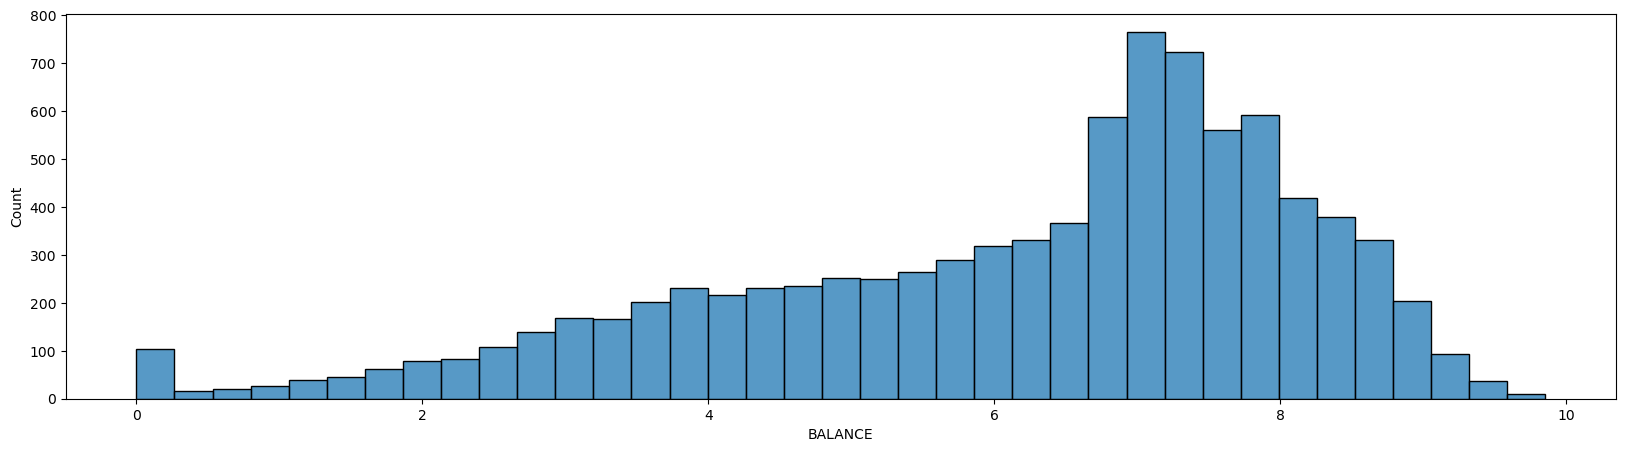

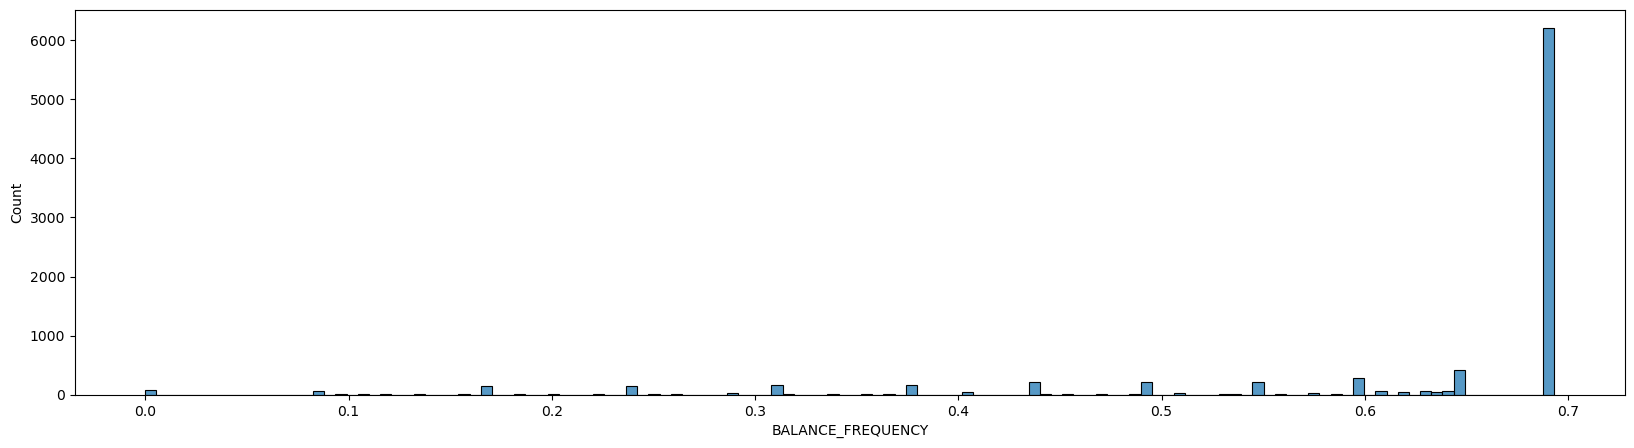

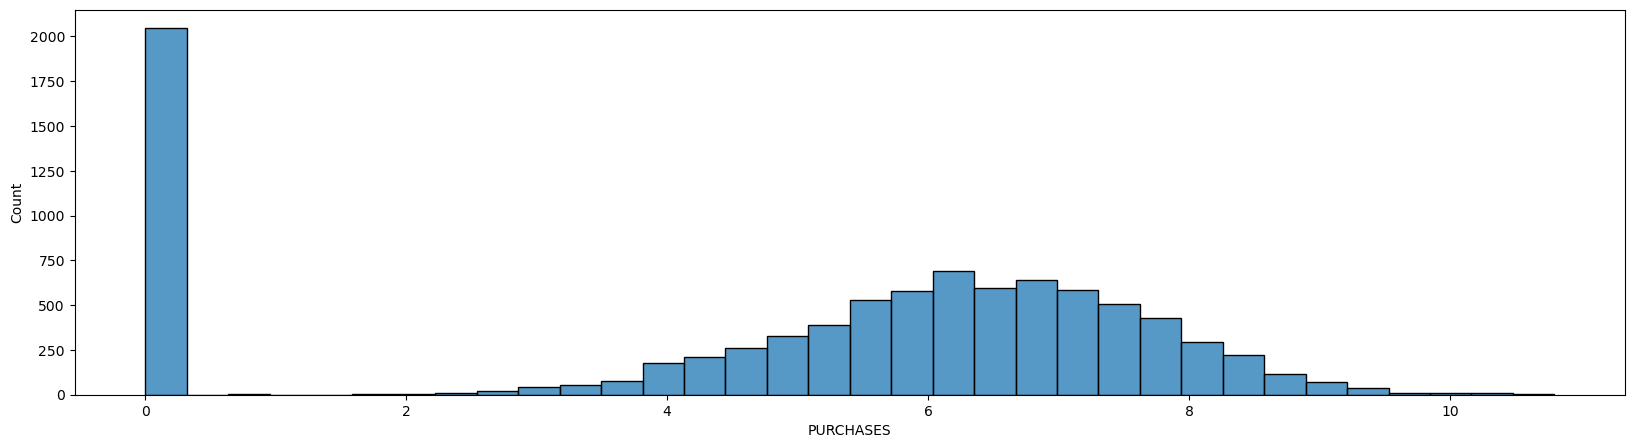

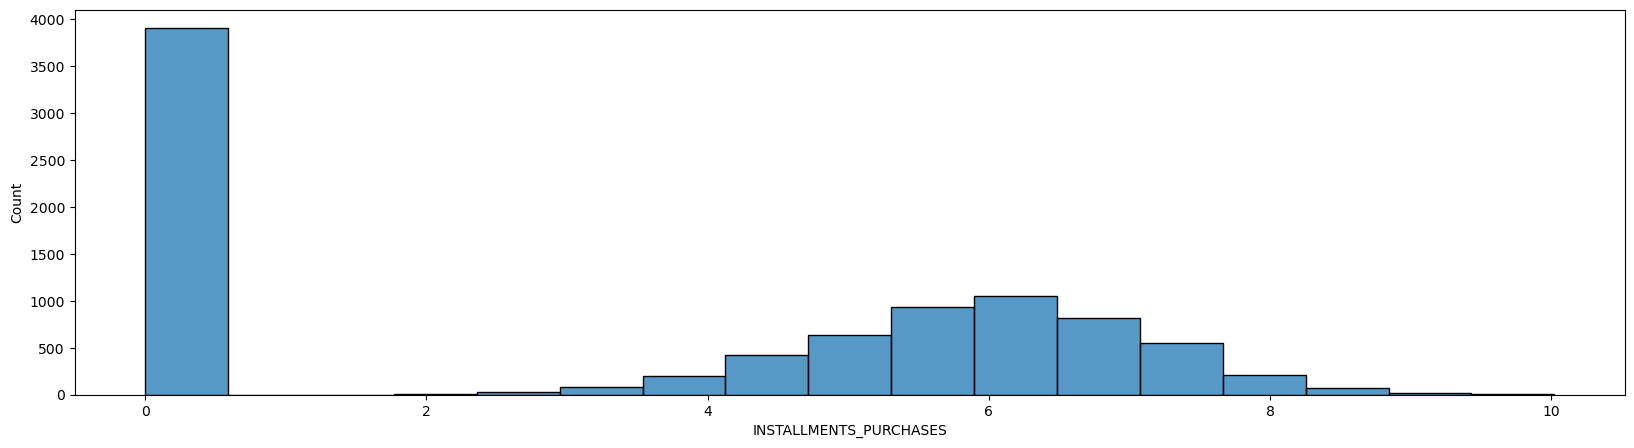

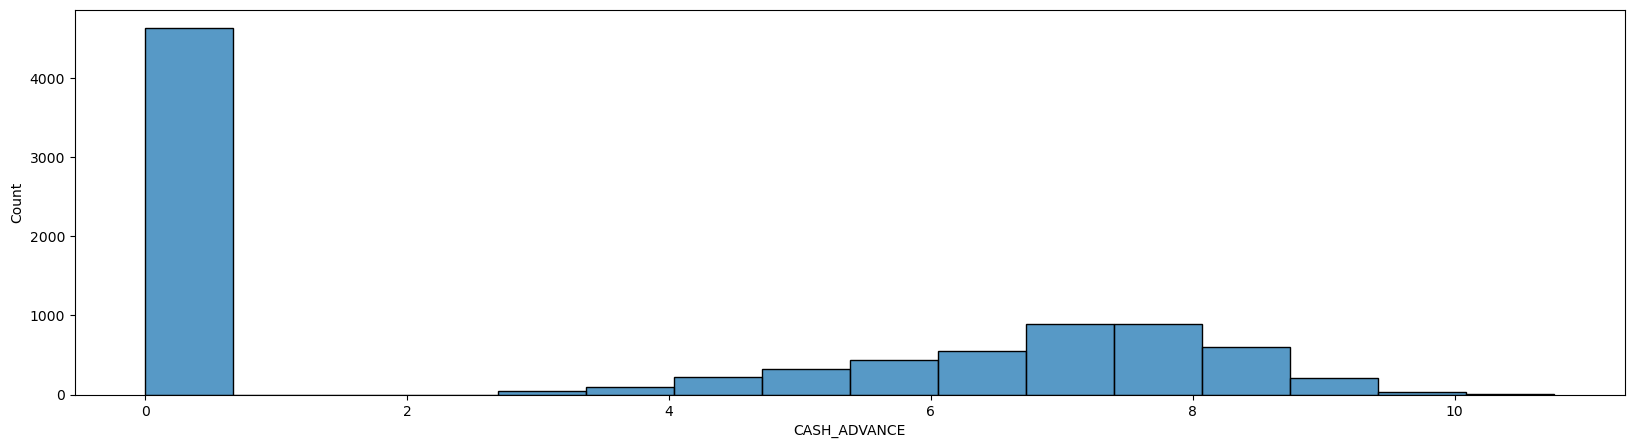

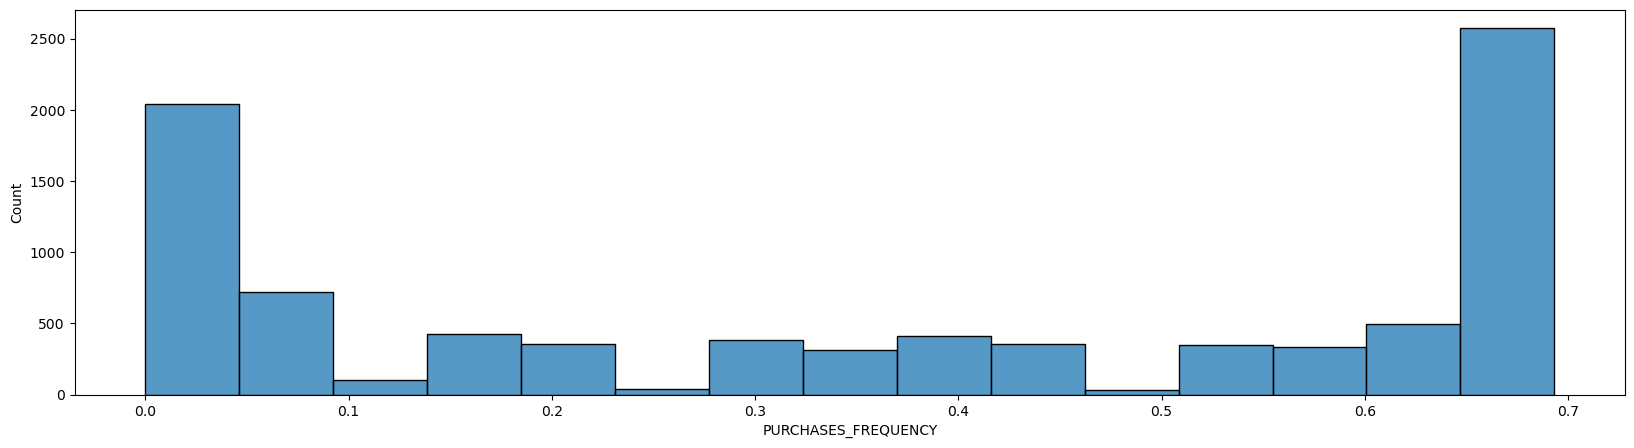

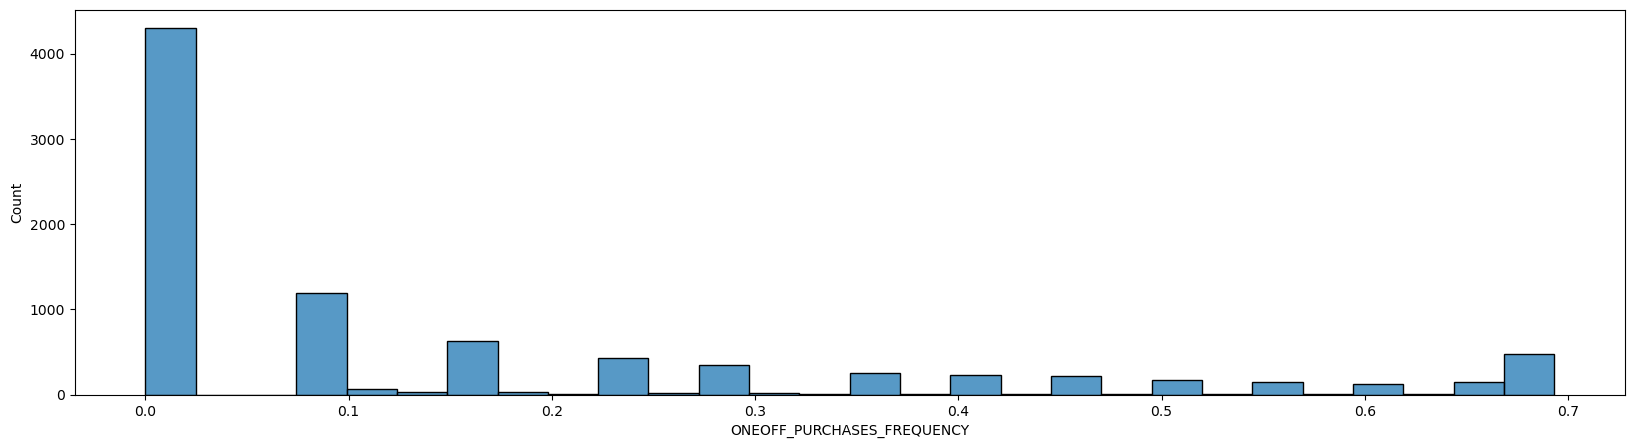

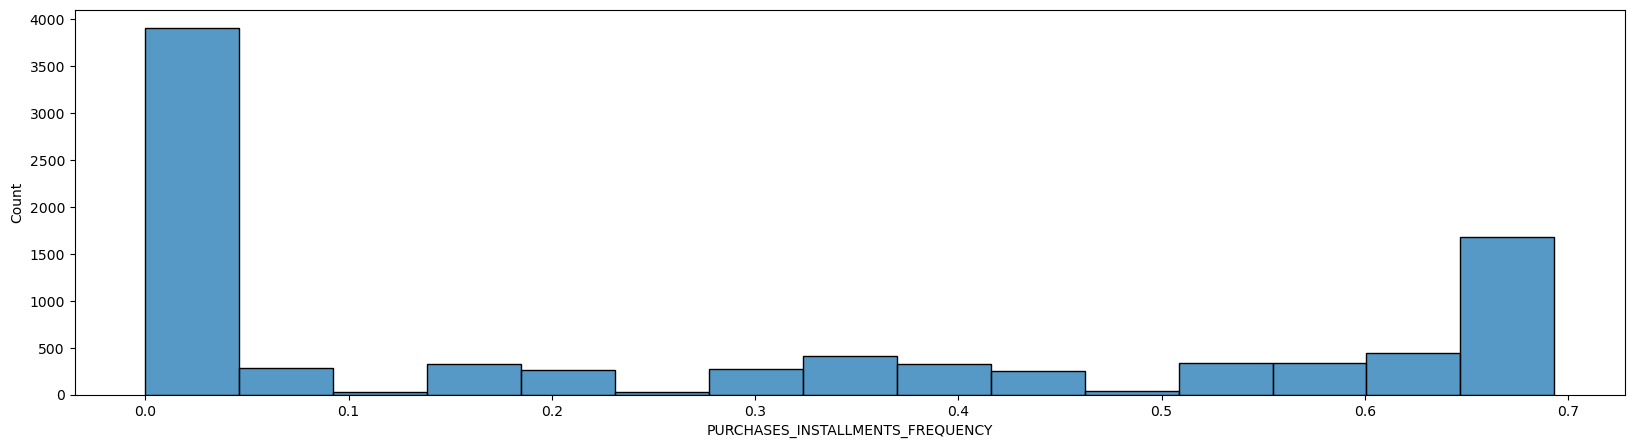

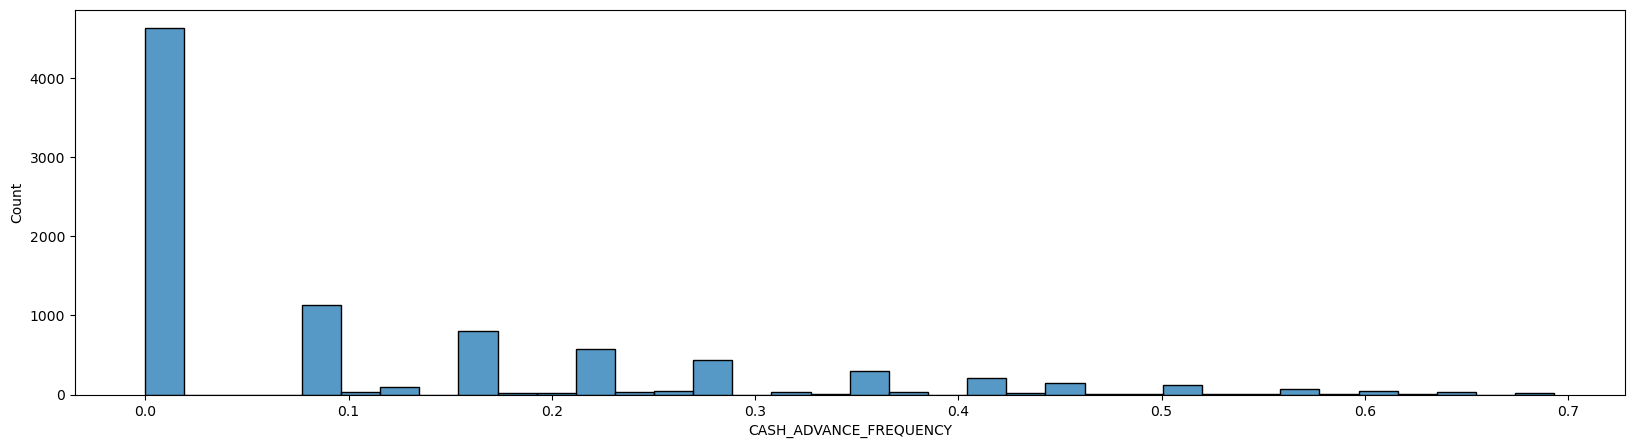

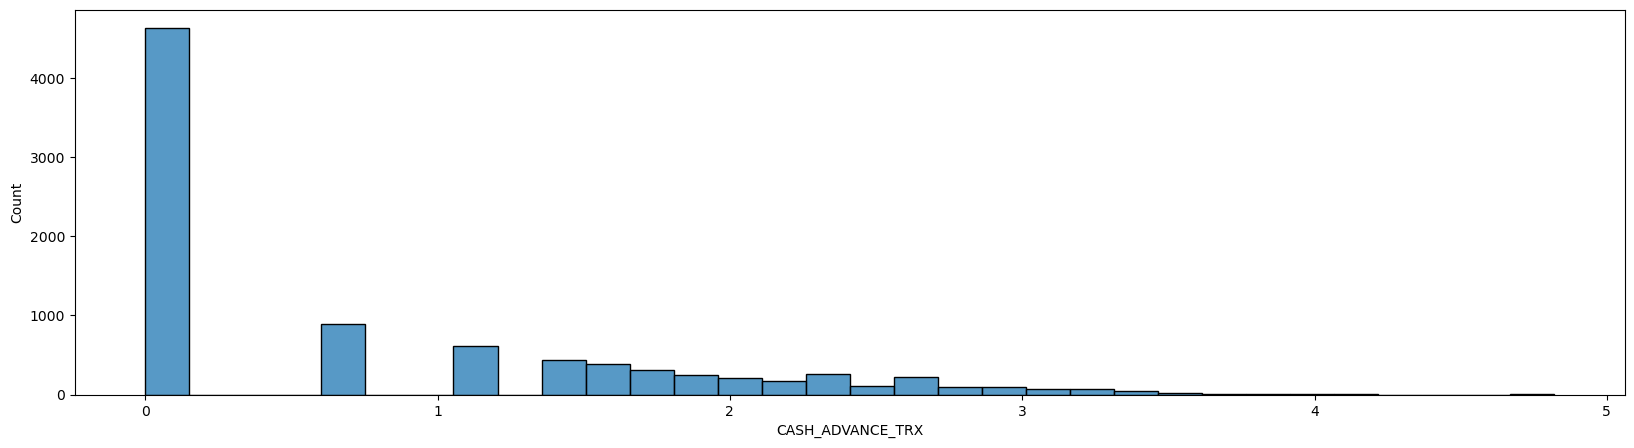

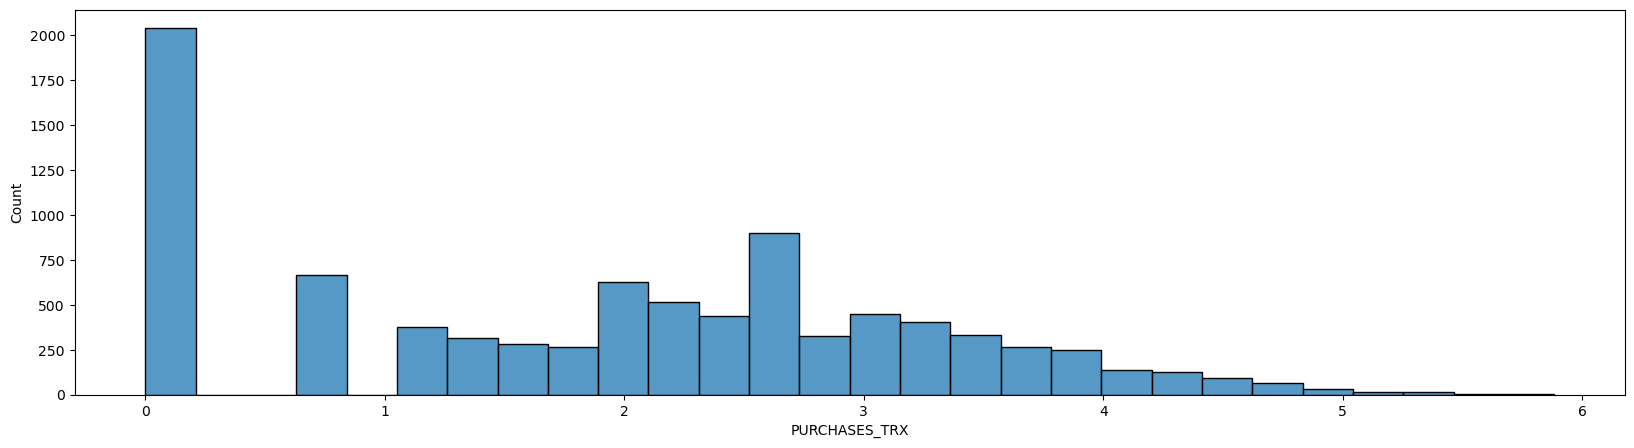

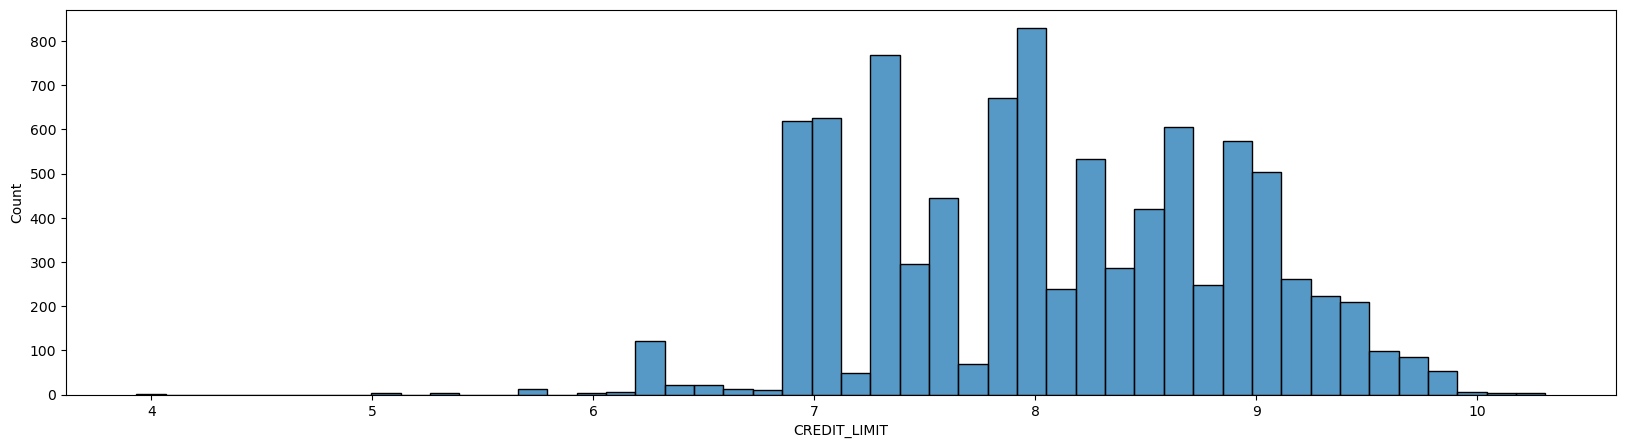

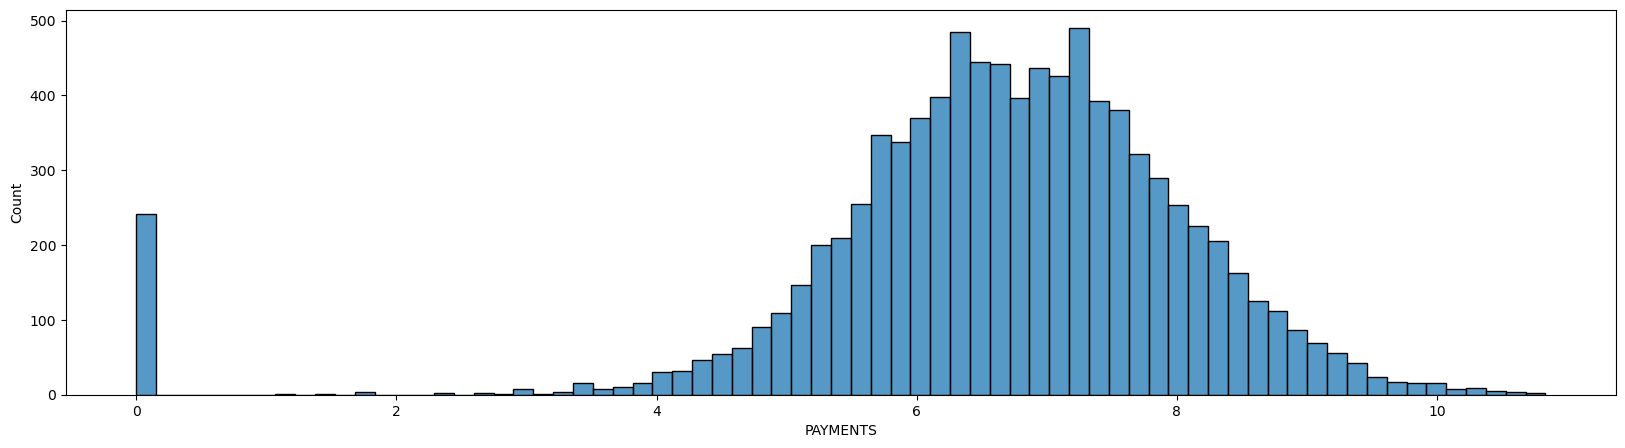

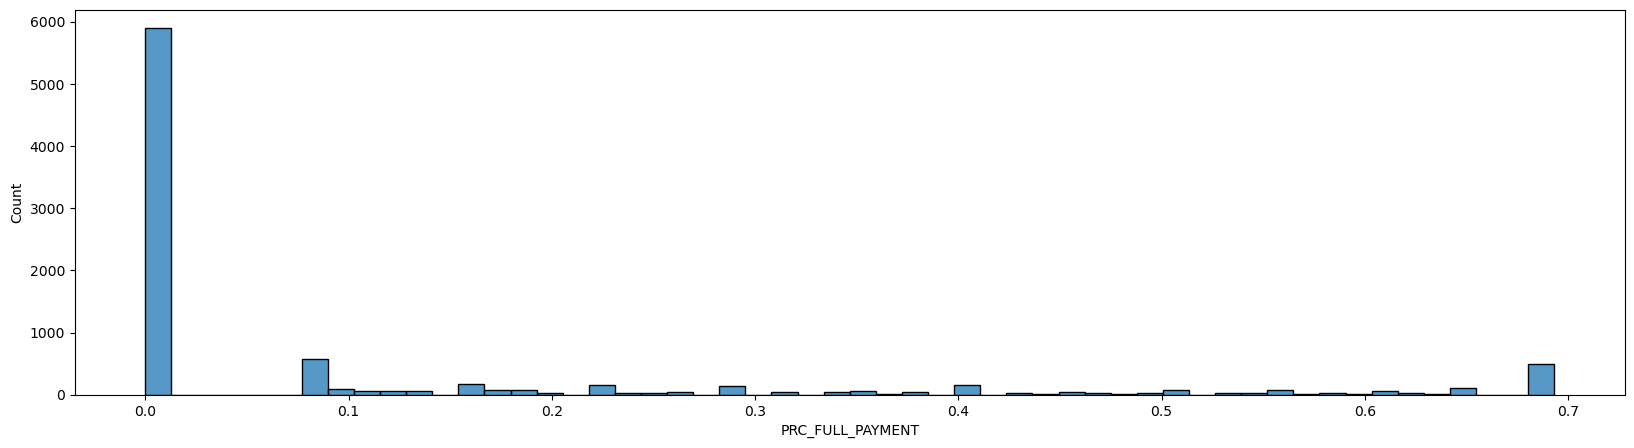

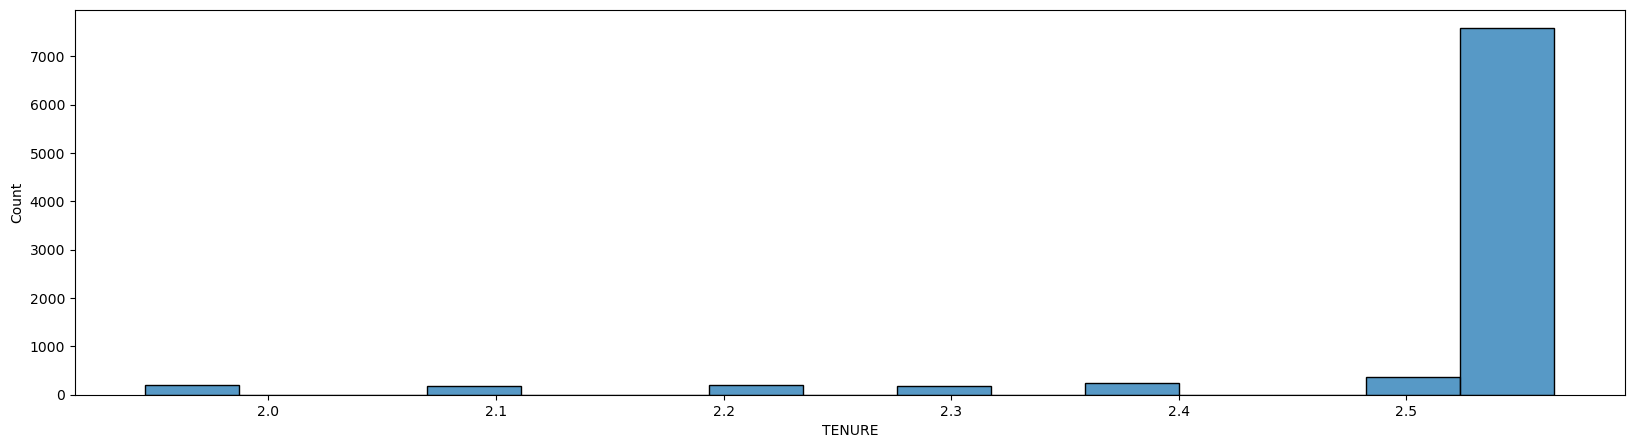

In [364]:
col = df_log_transformed.columns
for i in range(len(col)):
    plt.figure(figsize=(20,5))
    sns.histplot(data = df_log_transformed,x = col[i])
    plt.show()

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [365]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [366]:
# my kmean as function 

def findClosestCentroids(X, centroids):
    ll=np.array([])
    for i in centroids:
        l=np.linalg.norm(X-i,axis=1)
        ll=np.append(ll,l)  
    ll=ll.reshape(len(centroids),X.shape[0]).T
    idx=np.argmin(ll,axis=1)
    return idx 


def computeCentroids(X, idx, K):
    centroids=np.zeros((K,X.shape[1]))
    for i in range(K):
        var=np.where(idx==i)
        centroids[i]=np.mean(X[var],axis=0)
    return centroids


def kMeansInitCentroids(X, K):
    centroids=[]
    ran = np.random.choice(X.shape[0], K, replace=False)
    for i in range(K):
        centroids.append(X[ran[i]])
    centroids=np.array(centroids)    
    return centroids


def k_means(X,K,i=100):
    centroids=kMeansInitCentroids(X, K)
    for i in range(1,i):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx


def predict(centroids,x):
    label = findClosestCentroids(x, centroids)
    return label

In [367]:
class my_kmean:

    def __init__(self, k, i):
        self.k = k
        self.i = i
        self.centroids = None
        self.idx = None

    def fit(self, X):
        # convert the DataFrame to array    
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.centroids = self.kMeansInitCentroids(X, self.k)
        for _ in range(self.i):
            self.idx = self.findClosestCentroids(X, self.centroids)
            self.centroids = self.computeCentroids(X, self.idx, self.k)     
        return self.centroids, self.idx

    def kMeansInitCentroids(self, X, k):
        centroids = []
        ran = np.random.choice(X.shape[0], k, replace=False)
        for i in range(k):
            centroids.append(X[ran[i]])
        centroids = np.array(centroids)    
        return centroids

    def findClosestCentroids(self, X, centroids):
        ll = np.array([])
        for i in centroids:
            l = np.linalg.norm(X - i, axis=1)
            ll = np.append(ll, l)  
        ll = ll.reshape(len(centroids), X.shape[0]).T
        idx = np.argmin(ll, axis=1)
        return idx

    def computeCentroids(self, X, idx, k):
        centroids = np.zeros((k, X.shape[1]))
        for i in range(k):
            var = np.where(idx == i)[0]
            centroids[i] = np.mean(X[var], axis=0)
        return centroids

    def predict(self, x):
        labels = self.findClosestCentroids(x, self.centroids)
        return labels


In [368]:

my_km=my_kmean(5,2000)
centers , labels_custom = my_km.fit(df_log_transformed)

In [369]:
kmeans_sklearn = KMeans(n_clusters=5)
kmeans_sklearn.fit(df_log_transformed)

KMeans(n_clusters=5)

In [321]:
print("Scikit-Learn KMeans:", kmeans_sklearn.labels_)
print("Custom KMeans:", labels_custom)


Scikit-Learn KMeans: [1 4 3 ... 1 4 2]
Custom KMeans: [1 3 4 ... 1 3 2]


In [370]:
m,n=df_log_transformed.shape
distortions = []
inertias = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_log_transformed)
    distortions.append(sum(np.min(np.square(kmeans.transform(df_log_transformed)), axis=1)) / m)
    inertias.append(kmeans.inertia_)

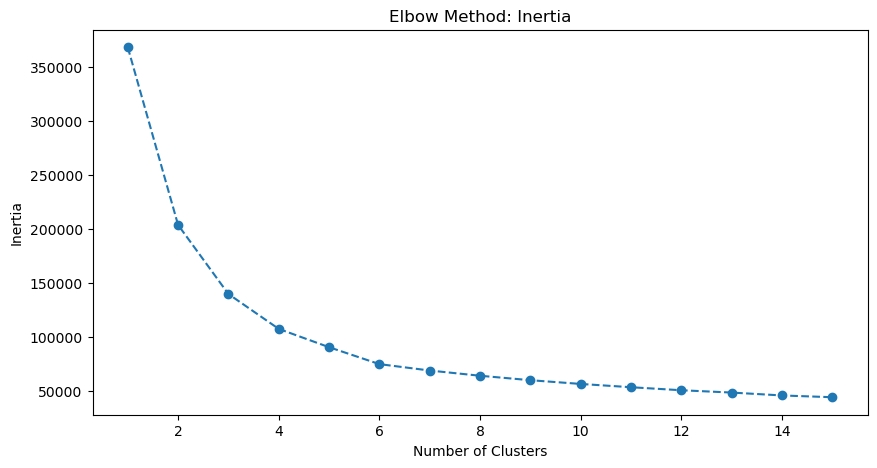

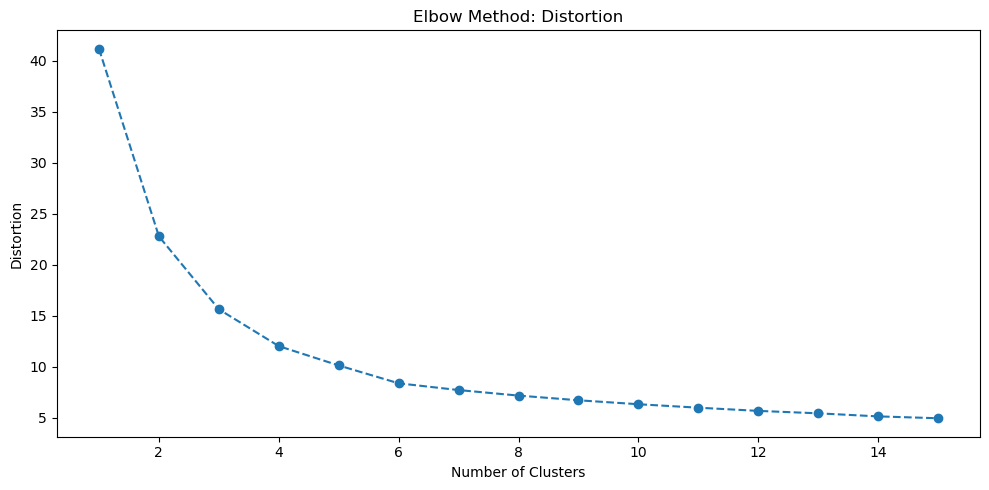

In [371]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia')

plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method: Distortion')

plt.tight_layout()
plt.show()

## 5 clusters

In [372]:
from sklearn.manifold import TSNE 

In [373]:
def draw_tsne(data , c=None):
    tsne = TSNE(n_components=2)
    tsne_data = tsne.fit_transform(data)

    plt.figure(figsize=(20,10))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1],c=c ,  cmap='viridis')
    plt.title('tsne Cluster Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

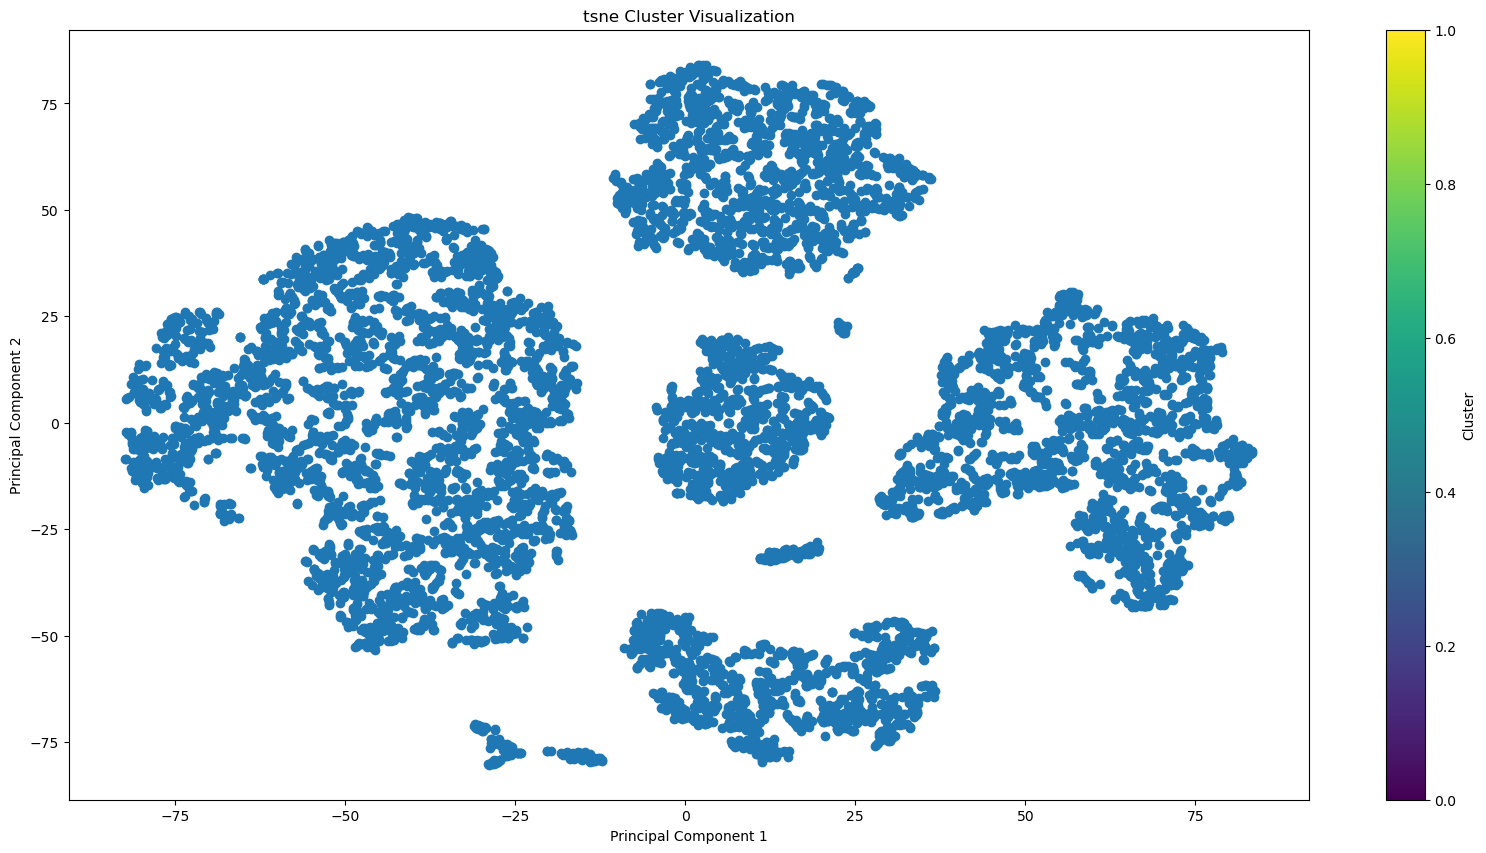

In [374]:
draw_tsne(df_log_transformed)

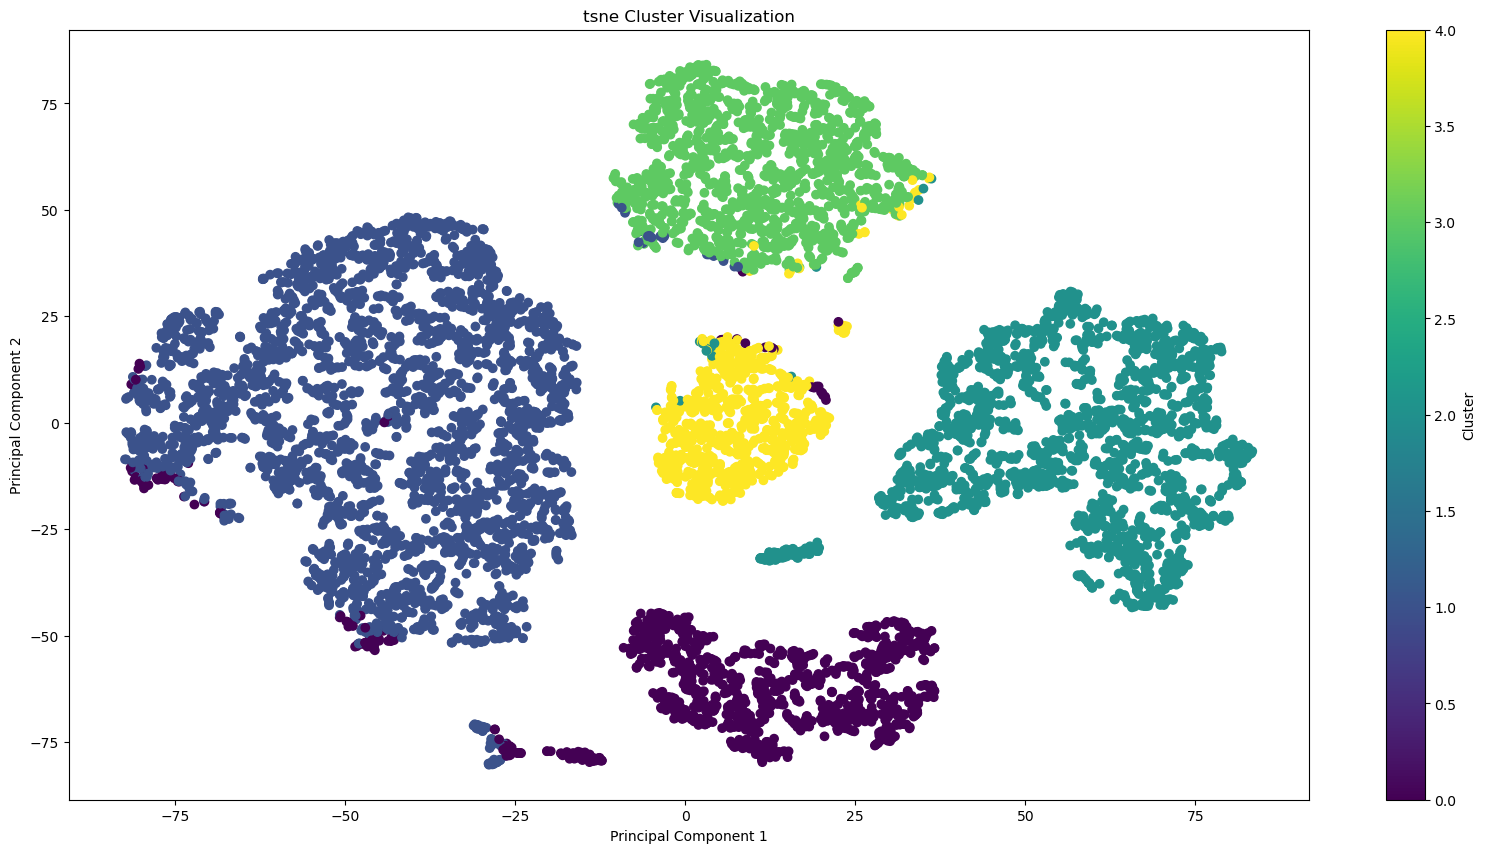

In [375]:
draw_tsne(df_log_transformed,kmeans_sklearn.predict(df_log_transformed))

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

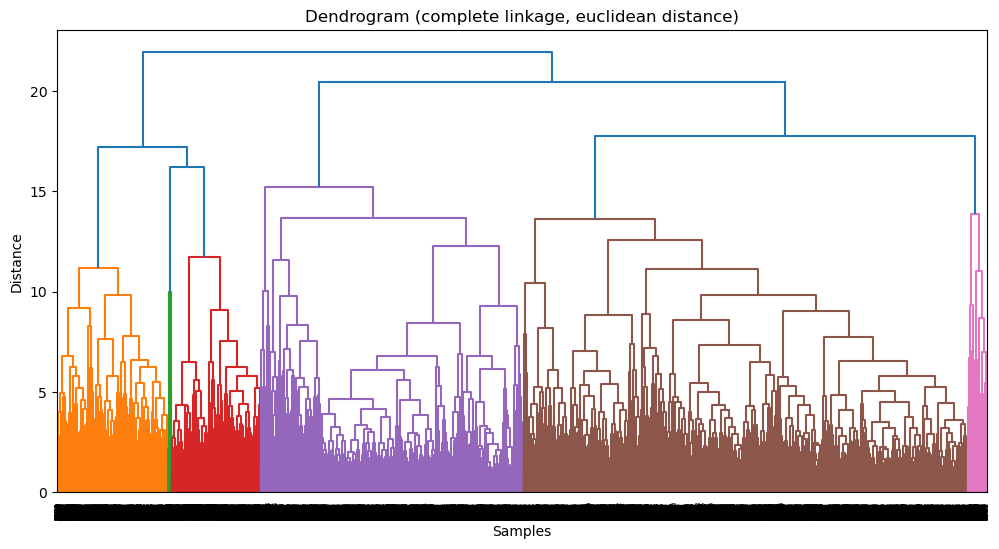

In [219]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Define the linkage criteria and distance function to be evaluated
linkage_criteria = 'complete'
distance_function = 'euclidean'

# Calculate the linkage matrix
linkage_matrix = shc.linkage(df_log_transformed, method=linkage_criteria, metric=distance_function)

# Generate dendrogram
plt.figure(figsize=(12, 6))
plt.title(f"Dendrogram ({linkage_criteria} linkage, {distance_function} distance)")
dendrogram(linkage_matrix)

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

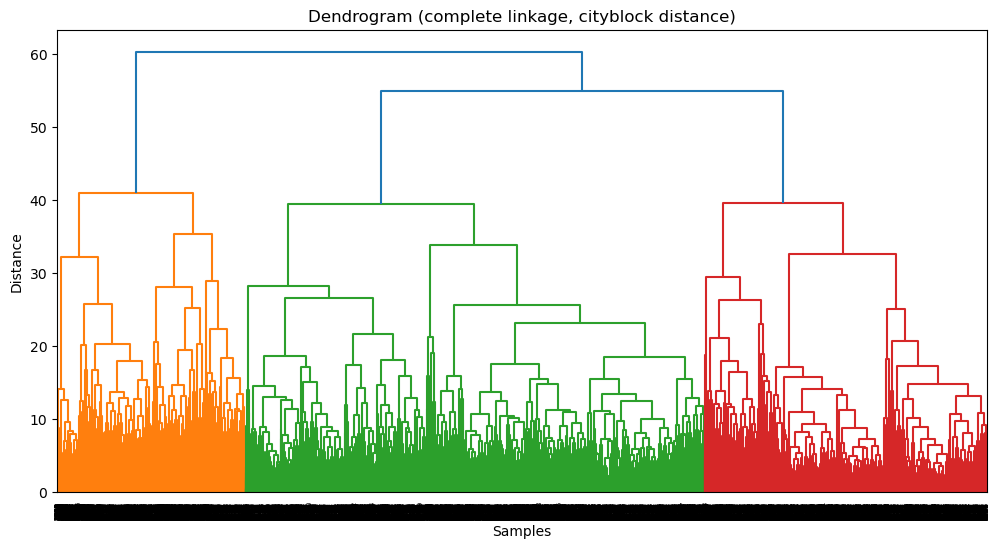

In [220]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define the linkage criteria and distance function to be evaluated
linkage_criteria = 'complete'
distance_function = 'cityblock'  # Manhattan distance

# Calculate the linkage matrix
linkage_matrix = linkage(df_log_transformed, method=linkage_criteria, metric=distance_function)

# Generate dendrogram
plt.figure(figsize=(12, 6))
plt.title(f"Dendrogram ({linkage_criteria} linkage, {distance_function} distance)")
dendrogram(linkage_matrix)

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


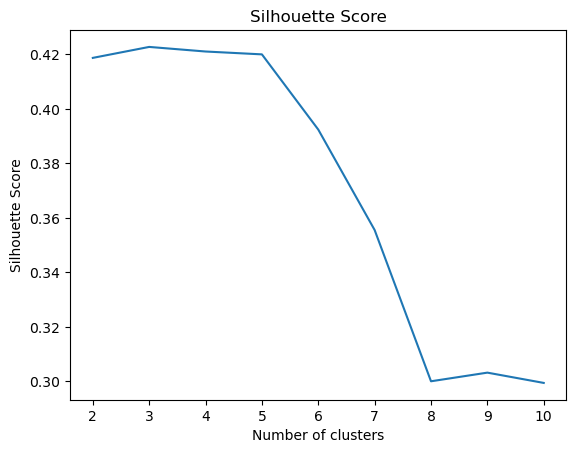

In [376]:
#training
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
for i in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=i)
    labels = clustering.fit_predict(df_log_transformed)
    silhouette_scores.append(silhouette_score(df_log_transformed, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


## 5 clusters

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

## kmean with pca

In [377]:

from sklearn.decomposition import PCA, KernelPCA

In [378]:
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(df_log_transformed)

In [379]:
m,n=pca_data.shape
distortions = []
inertias = []
for k in range(1,n+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    distortions.append(sum(np.min(np.square(kmeans.transform(pca_data)), axis=1)) / m)
    inertias.append(kmeans.inertia_)

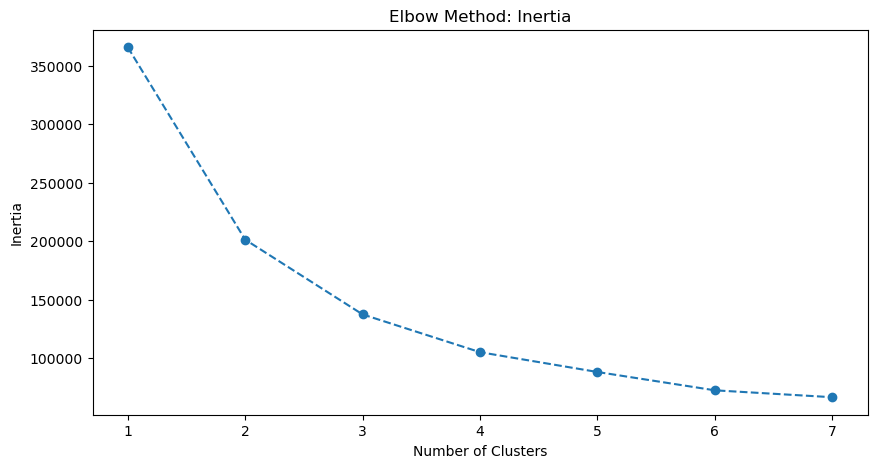

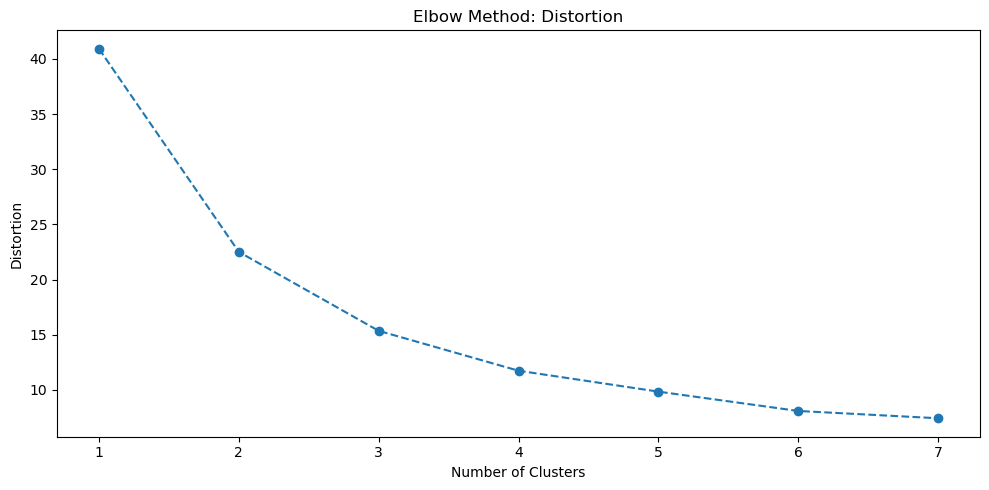

In [380]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, n+1), inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia')

plt.figure(figsize=(10, 5))
plt.plot(range(1, n+1), distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method: Distortion')

plt.tight_layout()
plt.show()

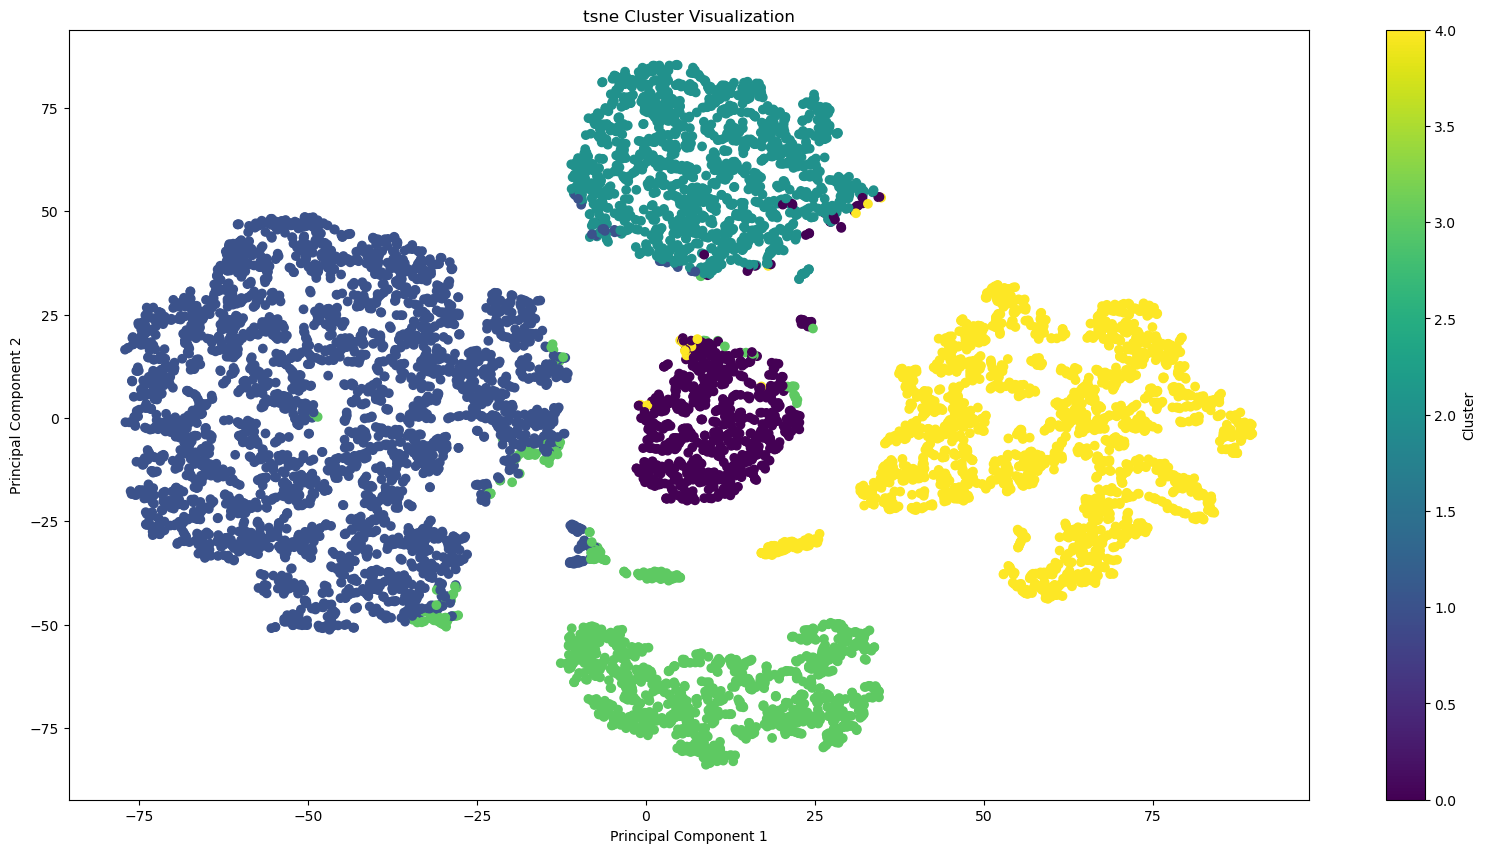

In [382]:
kmeans_sklearn = KMeans(n_clusters=5)
kmeans_sklearn.fit(pca_data)
draw_tsne(pca_data,kmeans_sklearn.predict(pca_data))

## Kernel PCA with cosine kernel

In [383]:

# Kernel PCA with cosine kernel
kernel_pca = KernelPCA(n_components=2, kernel='cosine')
X_kernel_pca = kernel_pca.fit_transform(df_log_transformed)


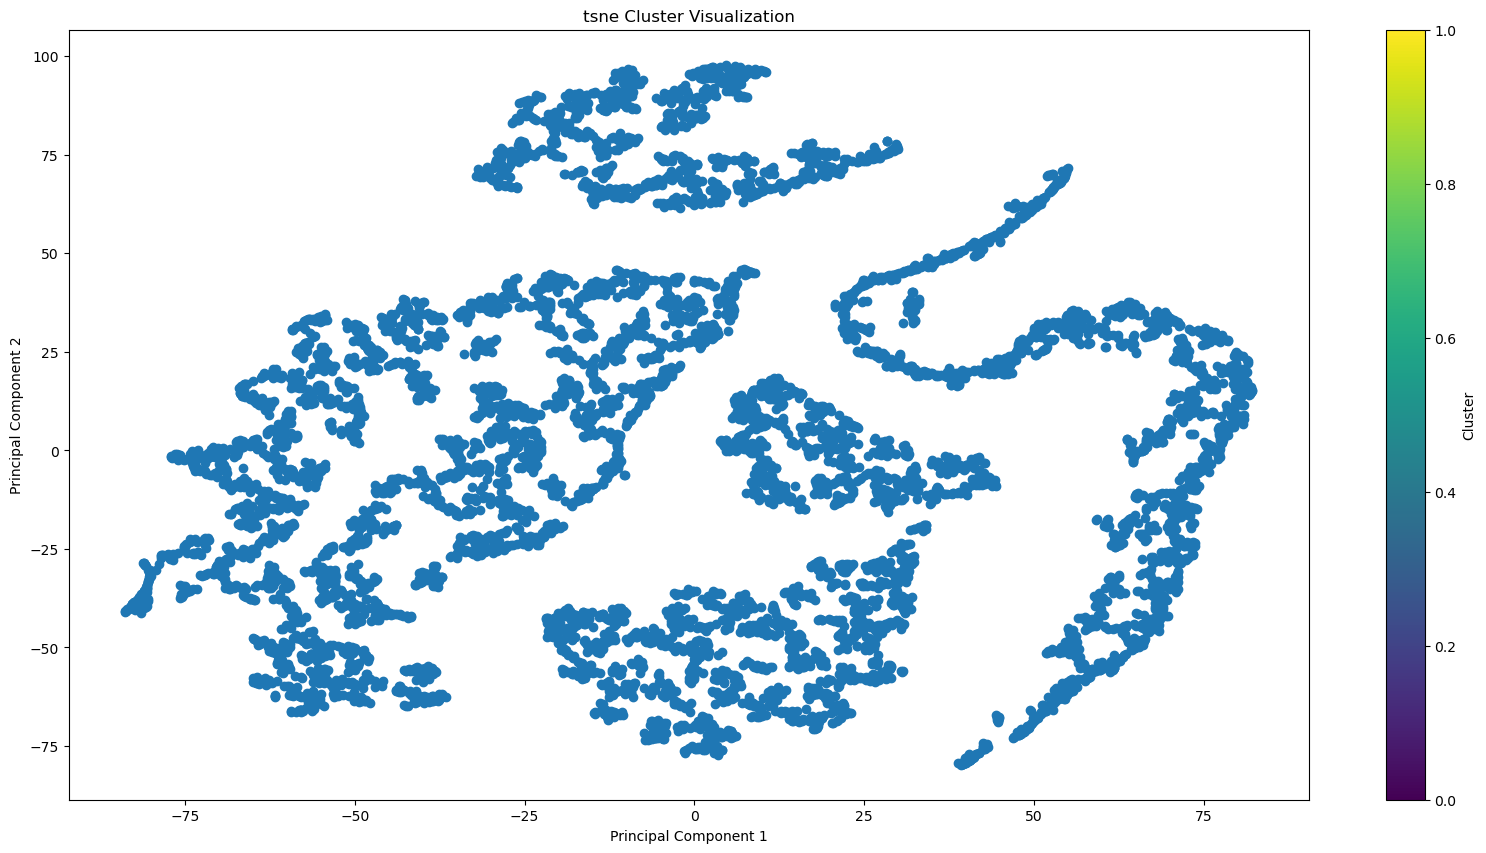

In [385]:
kmeans_sklearn = KMeans(n_clusters=5)
kmeans_sklearn.fit(X_kernel_pca)
draw_tsne(X_kernel_pca)

## the pca is better than kernal pca

## GaussianMixture

In [386]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)
gmm.fit(df_log_transformed)

labels = gmm.predict(df_log_transformed)


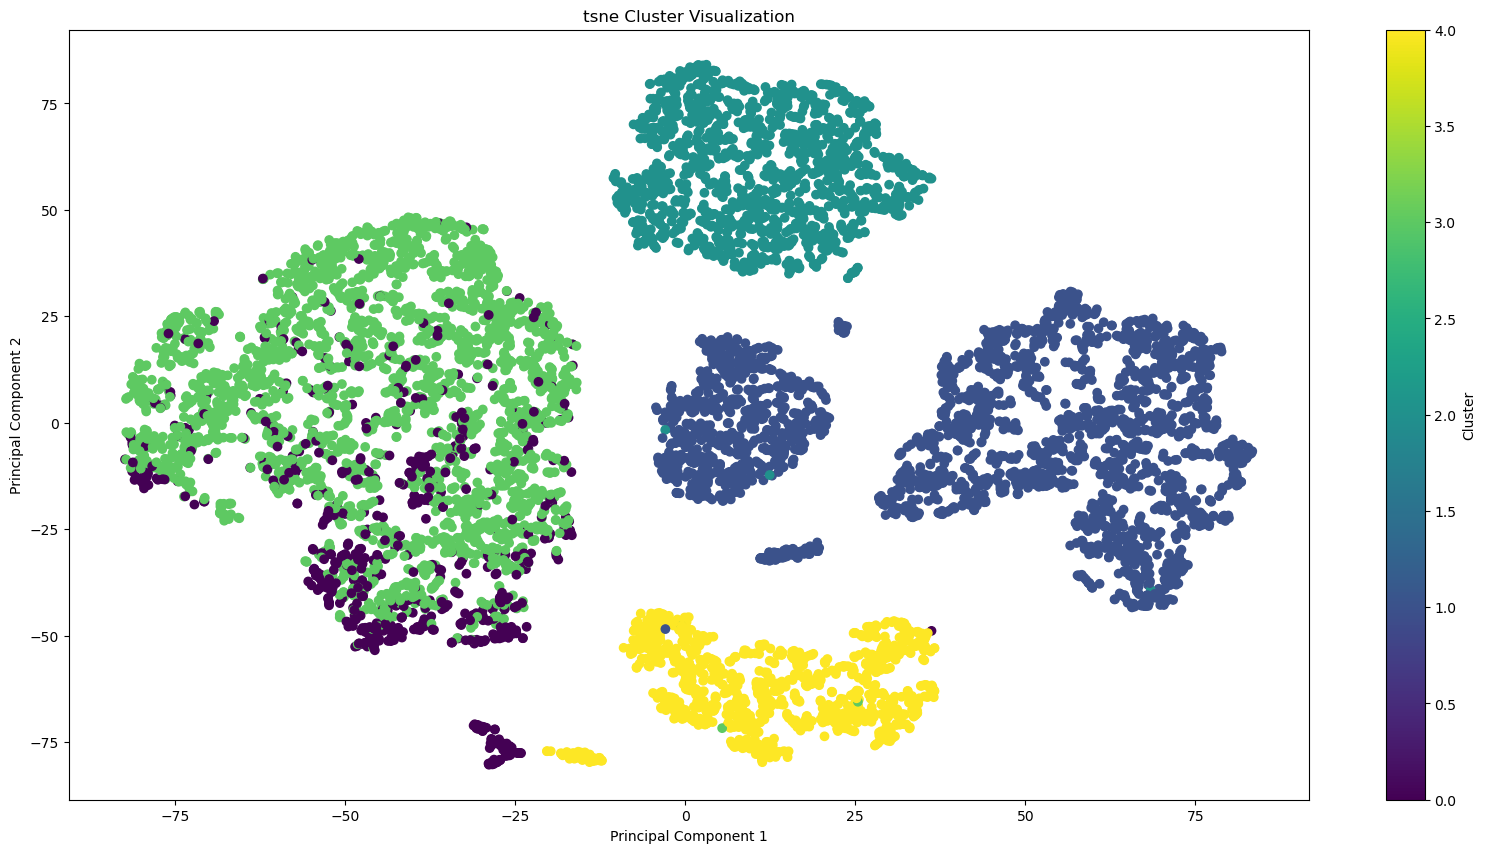

In [387]:
draw_tsne(df_log_transformed,labels)

## DBSCAN

In [336]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(df_log_transformed)


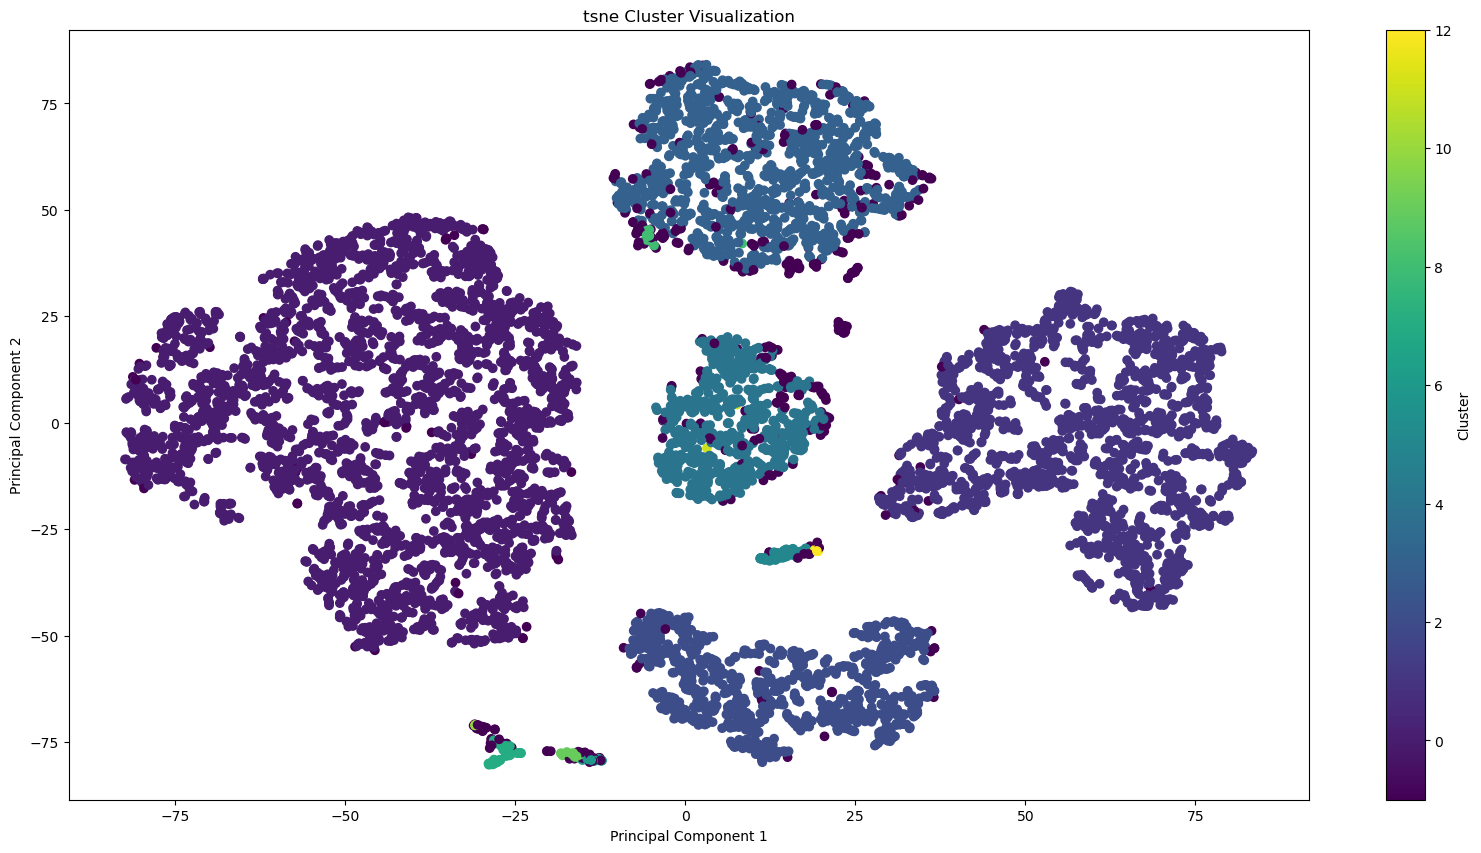

In [337]:
draw_tsne(df_log_transformed,labels)

## IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.5)

# Fit the Isolation Forest model to your data
isolation_forest.fit(df_log_transformed)

IsolationForest(contamination=0.01)

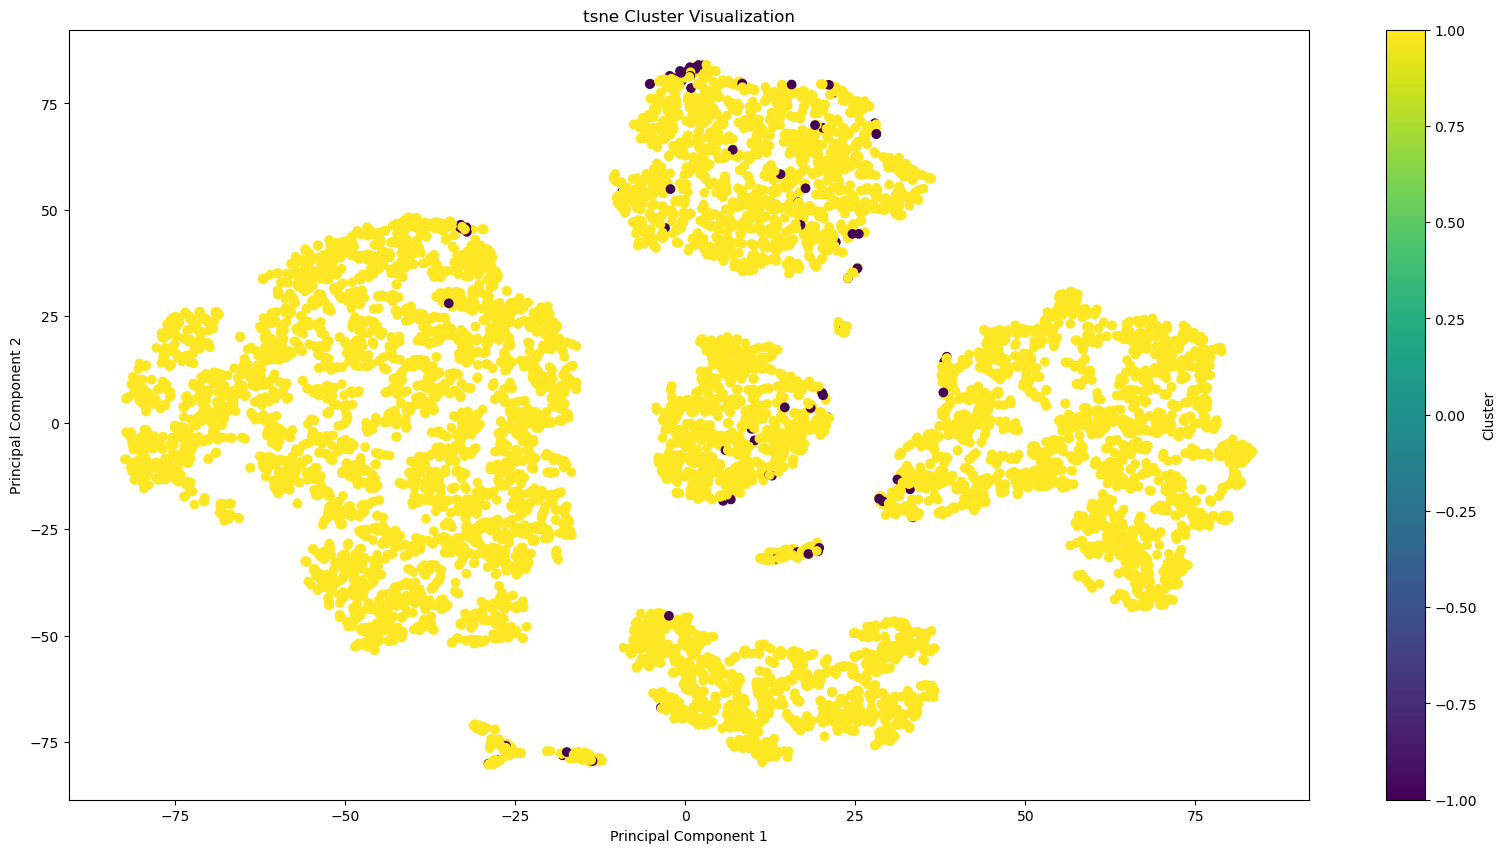

In [349]:
draw_tsne(df_log_transformed,isolation_forest.predict(df_log_transformed))

## kmean and gaussian mixture can be used to get better results